# Milestone 2

This notebook is designed to explore and clarify key aspects of our dataset, including both preprocessing and preliminary analysis. We begin by loading the data and implementing general preprocessing steps that will be uniform throughout the notebook. The subsequent sections are organized according to the X research questions highlighted in the project's README. Each section includes specialized data preparation steps, along with vital statistics and visual representations. Our initial exploratory work is intended to offer insights and confirm the suitability of the methodologies we have selected.

---

**Contents of notebook**:
1. [Section 1](#section1)
2. [Section 2](#section2)
    1. [Subsection 2.1](#section2_1)
    2. [Subsection 2.2](#section2_2)
3. [Section 3](#section3)

---

## Data Processing

---

### Loading data

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
import scipy.stats as stats
from datetime import datetime as dt
from helpers import *

warnings.filterwarnings("ignore")

/Users/thomassrour/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
DATA_FOLDER = './data/'
MOVIES_METADATA_PATH = DATA_FOLDER + 'movie.metadata.tsv'
PLOT_SUMMARIES_PATH = DATA_FOLDER + 'plot_summaries.txt'
CHARACTERS_METADATA_PATH = DATA_FOLDER +'character.metadata.tsv'
#IMDB
TITLE_RATINGS_PATH = DATA_FOLDER + 'title.ratings.tsv'
TITLE_BASICS_PATH = DATA_FOLDER + 'title.basics.tsv'
CREW_PATH = DATA_FOLDER + 'title.crew.tsv'
NAME_PATH =  DATA_FOLDER + "name.basics.tsv"
#Kaggle
MOVIES_PATH = DATA_FOLDER + 'movies.csv'
OSCARS_PATH = DATA_FOLDER + 'the_oscar_award.csv'
GOLDEN_GLOBE_PATH = DATA_FOLDER + 'golden_globe_awards.csv'

In [3]:
!pip install kaggle

zsh:1: command not found: pip


In [4]:
!kaggle datasets download -d akshaypawar7/millions-of-movies -p data/zip_files

zsh:1: command not found: kaggle


In [5]:
#Load data
metadata_df = pd.read_csv(MOVIES_METADATA_PATH, sep='\t',header=None, names=['id', 'freebase_id', 'title', 'release_date', 'boxOffice_revenue', 'runtime', 'language', 'country', 'genres'])

imdb_ratings_df = pd.read_csv(TITLE_RATINGS_PATH, sep='\t')
imdb_basics_df = pd.read_csv(TITLE_BASICS_PATH, sep='\t', low_memory=False)
imdb_crew_df = pd.read_csv(CREW_PATH, sep='\t')
imdb_names_df = pd.read_csv(NAME_PATH, sep='\t', header=0)

kaggle_df = pd.read_csv(MOVIES_PATH)

characters_metadata_df = pd.read_csv(CHARACTERS_METADATA_PATH, sep='\t', names = ['Wikipedia movie ID','Freebase movie ID','Movie release date','Character name','Actor date of birth','Actor gender','Actor height','Actor ethnicity','Actor name','Actor age at movie release','Freebase character/actor map ID','Freebase character ID','Freebase actor ID'])

oscars_df = pd.read_csv(OSCARS_PATH)
golden_globe_df =  pd.read_csv(GOLDEN_GLOBE_PATH)

### MOVIES

##### CMU MetaData Dataset

In [6]:
metadata_df.head()

,id,freebase_id,title,release_date,boxOffice_revenue,runtime,language,country,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [7]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81741 non-null  int64  
 1   freebase_id        81741 non-null  object 
 2   title              81741 non-null  object 
 3   release_date       74839 non-null  object 
 4   boxOffice_revenue  8401 non-null   float64
 5   runtime            61291 non-null  float64
 6   language           81741 non-null  object 
 7   country            81741 non-null  object 
 8   genres             81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [8]:
# Convert release date to datetime
metadata_df['release_date'] = metadata_df['release_date'].apply(convert_release_date)
metadata_df['year'] = metadata_df['release_date'].dt.year

#### IMDB datasets (ratings + crew + metadata)

IMDB ratings

In [9]:
imdb_ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,269
2,tt0000003,6.5,1912
3,tt0000004,5.5,178
4,tt0000005,6.2,2692


In [10]:
imdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369534 entries, 0 to 1369533
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1369534 non-null  object 
 1   averageRating  1369534 non-null  float64
 2   numVotes       1369534 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.3+ MB


In [11]:
imdb_ratings_df.describe()

,averageRating,numVotes
count,1.369534e+06,1.369534e+06
mean,6.959223e+00,1.038604e+03
std,1.382562e+00,1.759041e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.200000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.818872e+06


IMDB metadata

In [12]:
imdb_basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [13]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319916 entries, 0 to 10319915
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 708.6+ MB


In [14]:
imdb_basics_df['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [15]:
# Restrict our analysis to movies
imdb_basics_df = imdb_basics_df[imdb_basics_df['titleType'] == 'movie']
imdb_basics_df = imdb_basics_df.drop(columns = ['titleType'], axis=1)

IMDB movies crew

In [16]:
imdb_crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [17]:
imdb_names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0083922,tt0069467"


In [18]:
# Merge IMDb movies' rating and metadata
imdb_df = imdb_ratings_df.merge(imdb_basics_df, on='tconst', how='inner')
imdb_df = imdb_df.merge(imdb_crew_df, on='tconst', how='left')
imdb_df.head()

,tconst,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
0,tt0000009,5.3,207,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,nm0085156,nm0085156
1,tt0000147,5.3,485,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",nm0714557,\N
2,tt0000502,4.1,15,Bohemios,Bohemios,0,1905,\N,100,\N,nm0063413,"nm0063413,nm0657268,nm0675388"
3,tt0000574,6.0,855,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",nm0846879,nm0846879
4,tt0000591,5.0,21,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,nm0141150,nm0141150


In [19]:
# Clean data
imdb_df.loc[imdb_df['startYear']=='\\N', 'startYear'] = np.nan
imdb_df['startYear'] = pd.to_numeric(imdb_df['startYear'], errors='coerce')

imdb_df.loc[imdb_df['runtimeMinutes']=='\\N', 'runtimeMinutes'] = np.nan
imdb_df['runtimeMinutes'] = pd.to_numeric(imdb_df['runtimeMinutes'], errors='coerce')

imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300069 entries, 0 to 300068
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          300069 non-null  object 
 1   averageRating   300069 non-null  float64
 2   numVotes        300069 non-null  int64  
 3   primaryTitle    300069 non-null  object 
 4   originalTitle   300069 non-null  object 
 5   isAdult         300069 non-null  object 
 6   startYear       300032 non-null  float64
 7   endYear         300069 non-null  object 
 8   runtimeMinutes  270373 non-null  float64
 9   genres          300069 non-null  object 
 10  directors       300069 non-null  object 
 11  writers         300069 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 27.5+ MB


#### Kaggle movies dataset

In [20]:
kaggle_df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...


In [21]:
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722649 entries, 0 to 722648
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722649 non-null  int64  
 1   title                 722643 non-null  object 
 2   genres                511971 non-null  object 
 3   original_language     722649 non-null  object 
 4   overview              604165 non-null  object 
 5   popularity            722649 non-null  float64
 6   production_companies  337227 non-null  object 
 7   release_date          670577 non-null  object 
 8   budget                722649 non-null  float64
 9   revenue               722649 non-null  float64
 10  runtime               688231 non-null  float64
 11  status                722649 non-null  object 
 12  tagline               108238 non-null  object 
 13  vote_average          722649 non-null  float64
 14  vote_count            722649 non-null  float64
 15  

In [22]:
kaggle_df.drop(columns = ['id','credits','poster_path','keywords','backdrop_path','recommendations','status','tagline'], inplace = True)
kaggle_df['release_date'] = kaggle_df['release_date'].apply(convert_release_date)
kaggle_df['year'] = kaggle_df['release_date'].dt.year

#### Merging the dataframes

- **Movie Metadata Identification:** The `Movie.metadata.tsv` file uses Wikipedia IDs to identify movies, whereas the IMDb datasets utilize their unique IDs. Additionally, the Kaggle dataset employs a different set of IDs.

- **Unified Identification Approach:** To merge data from these diverse sources, **movie names will be used as a common identifier**. This approach assumes that movie names are consistent across the datasets.

- **Handling Inconsistent Release Dates:** Post-merging, the dataset will be filtered to **remove entries with release dates that differ by more than one year**. This step is crucial to ensure data consistency and reliability, especially when dealing with release date discrepancies across different sources.


In [23]:
# Check both primary and original Title
primary_merge = metadata_df.merge(imdb_df, left_on='title', right_on='primaryTitle', how='left')
original_merge = metadata_df.merge(imdb_df, left_on='title', right_on='originalTitle', how='left')
ratings_df = pd.concat([primary_merge, original_merge]).drop_duplicates()
ratings_df

,id,freebase_id,title,release_date,boxOffice_revenue,runtime,language,country,genres_x,year,...,numVotes,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,directors,writers
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,...,56933.0,Ghosts of Mars,Ghosts of Mars,0,2001.0,\N,98.0,"Action,Horror,Sci-Fi",nm0000118,"nm0837917,nm0000118"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,NaT,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN,...,41.0,Brun bitter,Brun bitter,0,1988.0,\N,83.0,"Crime,Drama",nm0803751,"nm0803751,nm0820866"
3,9363483,/m/0285_cd,White Of The Eye,NaT,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,NaT,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",NaN,...,623.0,A Woman in Flames,Die flambierte Frau,0,1983.0,\N,106.0,Drama,nm0885554,"nm0885554,nm0959016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112597,21896644,/m/05p1kkz,Trileros,NaT,NaN,NaN,{},"{""/m/06mkj"": ""Spain""}","{""/m/01z4y"": ""Comedy""}",NaN,...,64.0,Tricksters,Trileros,0,2003.0,\N,112.0,Comedy,nm0714002,"nm0540088,nm0714002"
112619,4037444,/m/0bdtyw,Producing Adults,NaT,NaN,100.0,"{""/m/01gp_d"": ""Finnish Language""}","{""/m/02vzc"": ""Finland"", ""/m/0d0vqn"": ""Sweden""}","{""/m/0hn10"": ""LGBT"", ""/m/03q4nz"": ""World cinem...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112640,5583712,/m/0b_l77x,The Arch,1969-12-18,NaN,94.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/07s9rl0"": ""Drama"", ""/m/0gw5qqq"": ""Chinese...",1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112650,31026778,/m/0gg59v2,Secreto eterno,NaT,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0b90_r"": ""Mexico""}","{""/m/07s9rl0"": ""Drama""}",NaN,...,8.0,The Eternal Secret,Secreto eterno,0,1942.0,\N,103.0,Drama,nm0649651,nm0649651


In [24]:
# Tolerate at most 1 year difference
ratings_df['startYear'].fillna(-1, inplace=True)
ratings_df['releaseDiff'] = (ratings_df['year'] - ratings_df['startYear']).abs()
ratings_df = ratings_df[ratings_df['releaseDiff'] <= 1]
ratings_df = ratings_df.drop(columns=['releaseDiff'],axis=1)
ratings_df

,id,freebase_id,title,release_date,boxOffice_revenue,runtime,language,country,genres_x,year,...,numVotes,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y,directors,writers
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,...,56933.0,Ghosts of Mars,Ghosts of Mars,0,2001.0,\N,98.0,"Action,Horror,Sci-Fi",nm0000118,"nm0837917,nm0000118"
10,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,2270.0,Alexander's Ragtime Band,Alexander's Ragtime Band,0,1938.0,\N,106.0,"Drama,Music,Musical",nm0454771,"nm0778636,nm0873707,nm0792553,nm0000927,nm0316..."
17,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989.0,...,31216.0,Henry V,Henry V,0,1989.0,\N,137.0,"Biography,Drama,History",nm0000110,"nm0000636,nm0000110"
23,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964.0,...,181875.0,Mary Poppins,Mary Poppins,0,1964.0,\N,139.0,"Comedy,Family,Fantasy",nm0829038,"nm0909556,nm0196119,nm0871308"
27,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999.0,...,5991.0,New Rose Hotel,New Rose Hotel,0,1998.0,\N,93.0,"Drama,Mystery,Sci-Fi",nm0001206,"nm0317218,nm0001206,nm0957631"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111892,31422455,/m/0dkc35r,A Very Harold & Kumar 3D Christmas,2011-11-04,35387212.0,108.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z4y"": ""Comedy""}",2011.0,...,71744.0,A Very Harold & Kumar Christmas,A Very Harold & Kumar 3D Christmas,0,2011.0,\N,90.0,"Adventure,Comedy",nm0833889,"nm1375358,nm1376383"
112046,17789399,/m/047g4zk,Lesbian Vampire Killers,2009-03-20,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02jx1"": ""England"", ""/m/07ssc"": ""United Ki...","{""/m/0gf28"": ""Parody"", ""/m/02kdv5l"": ""Action"",...",2009.0,...,20673.0,Vampire Killers,Lesbian Vampire Killers,0,2009.0,\N,86.0,"Action,Comedy,Fantasy",nm0165616,"nm1546056,nm2013358"
112099,26743619,/m/0bmj7yy,The Calendar,1931-10-31,NaN,80.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,14.0,Bachelor's Folly,The Calendar,0,1931.0,\N,80.0,Drama,nm0403054,"nm0534191,nm0829038,nm0908624"
112334,33834117,/m/0hnffsw,Ivanhoe,1913-07-01,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1913.0,...,17.0,Rebecca the Jewess,Ivanhoe,0,1913.0,\N,NaN,Drama,nm0052549,"nm0052549,nm0779797"


In [25]:
# Merge CMU and IMDb datasets with the Kaggle dataset
revenues_ratings_df = ratings_df.merge(
    kaggle_df,
    on='title',
    how='left'
)

# Tolerate at most 1 year difference
revenues_ratings_df['releaseDiff2'] = (revenues_ratings_df['year_x'] - revenues_ratings_df['year_y']).abs()
revenues_ratings_df = revenues_ratings_df[revenues_ratings_df['releaseDiff2'] <= 1]
revenues_ratings_df = revenues_ratings_df.drop(columns=['release_date_y','runtime_y','genres_y','runtimeMinutes','releaseDiff2','year_y'],axis=1)
revenues_ratings_df.rename(columns={'year_x': "year",'genre_x': "genre", "release_date_x":"release_date","runtime_x":"runtime"},inplace = True)
revenues_ratings_df

,id,freebase_id,title,release_date,boxOffice_revenue,runtime,language,country,genres_x,year,...,writers,genres,original_language,overview,popularity,production_companies,budget,revenue,vote_average,vote_count
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,...,"nm0837917,nm0000118",Action-Horror-Science Fiction,en,In 2176 a Martian police unit is sent to pick ...,13.057,Screen Gems-Storm King Productions-Animationwerks,28000000.0,14010832.0,5.154,911.0
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,"nm0778636,nm0873707,nm0792553,nm0000927,nm0316...",Drama-Music-Romance,en,Classical violinist Roger Grant disappoints hi...,2.030,20th Century Fox,2000000.0,4000000.0,6.614,22.0
3,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989.0,...,"nm0000636,nm0000110",War-Drama-History,en,Gritty adaption of William Shakespeare's play ...,10.290,BBC Films-Samuel Goldwyn Company-Renaissance F...,9000000.0,10176701.0,7.300,296.0
7,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964.0,...,"nm0909556,nm0196119,nm0871308",Comedy-Family-Fantasy,en,Mr Banks is looking for a nanny for his two mi...,31.512,Walt Disney Productions,6000000.0,103082380.0,7.568,4163.0
8,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999.0,...,"nm0317218,nm0001206,nm0957631",Drama-Mystery-Science Fiction,en,A corporate raider and his henchman use a chan...,8.734,Quadra Entertainment-Pressman Film,0.0,21521.0,5.300,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78727,31901248,/m/0gvsf4t,Cape Forlorn,1931-01-08,NaN,62.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,"nm0243295,nm0367518,nm0447655",Drama,en,William Kell the keeper of a lighthouse on a l...,0.621,British International Pictures,0.0,0.0,7.500,1.0
78729,17789399,/m/047g4zk,Lesbian Vampire Killers,2009-03-20,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02jx1"": ""England"", ""/m/07ssc"": ""United Ki...","{""/m/0gf28"": ""Parody"", ""/m/02kdv5l"": ""Action"",...",2009.0,...,"nm1546056,nm2013358",Horror-Comedy,en,With their women having been enslaved by a pac...,16.030,AV Pictures,0.0,0.0,5.200,318.0
78731,26743619,/m/0bmj7yy,The Calendar,1931-10-31,NaN,80.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,"nm0534191,nm0829038,nm0908624",Drama,en,Racehorse owner Anson is swindled by a woman n...,0.841,British Lion Films-Gainsborough Pictures,0.0,0.0,0.000,0.0
78736,33834117,/m/0hnffsw,Ivanhoe,1913-07-01,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1913.0,...,"nm0052549,nm0779797",Adventure-Drama-Romance,en,Wilfred of Ivanhoe (played by King Baggot) son...,1.131,Universal Film Manufacturing Company,0.0,0.0,4.700,3.0


In [26]:
revenues_ratings_df.drop_duplicates(subset=['freebase_id'],keep='first',inplace=True)

Almost 90% of the movie revenues are absent. We used the kaggle dataset to enrich our dataset:

In [27]:
nan_percentage = revenues_ratings_df['boxOffice_revenue'].isna().mean() * 100
nan_percentage

70.4188738473612

In [28]:
nan_percentage =  metadata_df['boxOffice_revenue'].isna().mean() * 100
nan_percentage

89.72241592346558

In [29]:
nan_percentage = (revenues_ratings_df['revenue'] == 0).mean() * 100
nan_percentage

70.38453992544635

In [30]:
# Replace NaN values in boxOffice_revenue with revenue values only when revenue is not 0
revenues_ratings_df.loc[revenues_ratings_df['boxOffice_revenue'].isna() & (revenues_ratings_df['revenue'] != 0), 'boxOffice_revenue'] = revenues_ratings_df['revenue']

In [31]:
nan_percentage = revenues_ratings_df['boxOffice_revenue'].isna().mean() * 100
nan_percentage

62.01196782421032

We recovered around X% of relevant data!

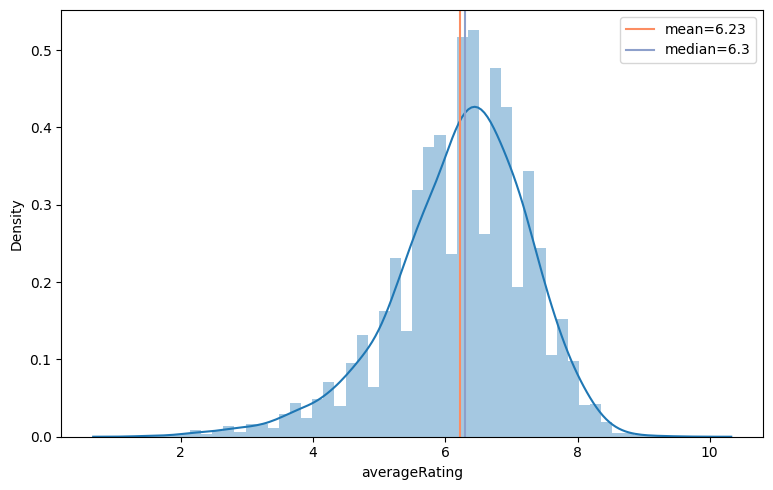

In [32]:
# Average rating distribution shows a classic negative skewed distribution where the median is larger than mean. 
ratings = dict(mean=revenues_ratings_df.averageRating.mean(),
              median=revenues_ratings_df.averageRating.median())


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(revenues_ratings_df.averageRating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"mean={round(ratings['mean'],2)}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"median={round(ratings['median'],2)}")
plt.legend()
plt.tight_layout()
plt.show()


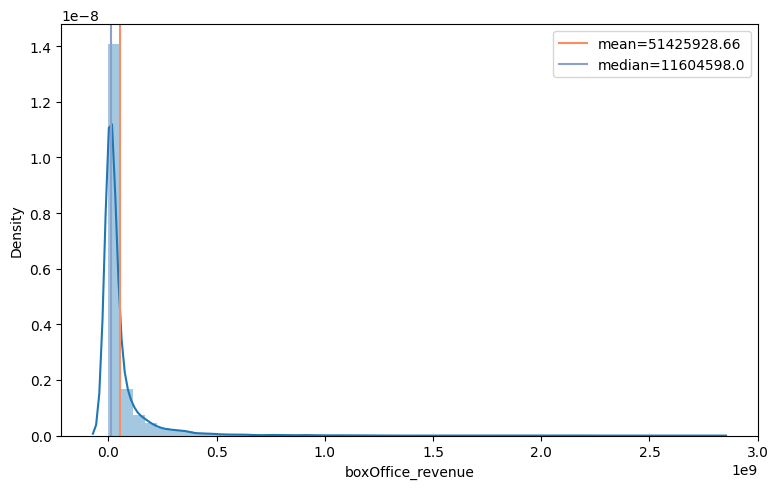

In [33]:
ratings = dict(mean=revenues_ratings_df.boxOffice_revenue.mean(),
              median=revenues_ratings_df.boxOffice_revenue.median())


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(revenues_ratings_df.boxOffice_revenue,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"mean={round(ratings['mean'],2)}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"median={round(ratings['median'],2)}")
plt.legend()
plt.tight_layout()
plt.show()


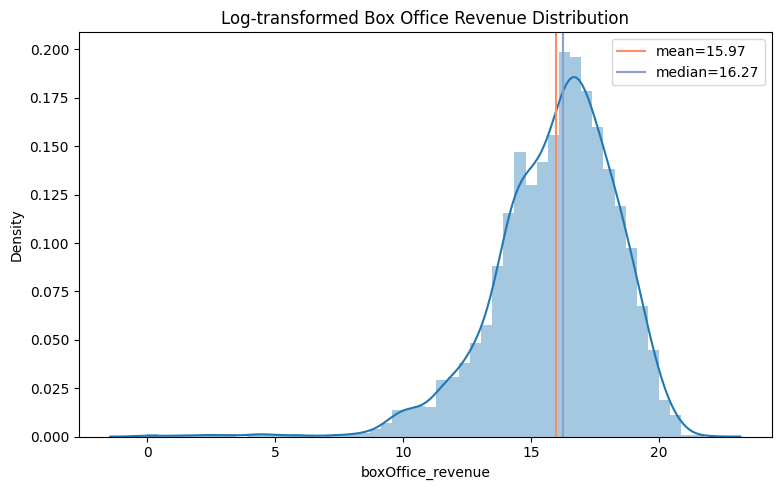

In [34]:
# Filter out non-positive values
positive_revenue_df = revenues_ratings_df[revenues_ratings_df.boxOffice_revenue > 0]

# Calculate the logarithm of the revenues
log_revenues = np.log(positive_revenue_df.boxOffice_revenue)

# Calculate mean and median
log_ratings = dict(mean=log_revenues.mean(), median=log_revenues.median())

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(log_revenues, kde_kws=dict(bw=0.2))
ax1.axvline(x=log_ratings["mean"], c=sns.color_palette("Set2")[1], label=f"mean={round(log_ratings['mean'],2)}")
ax1.axvline(x=log_ratings["median"], c=sns.color_palette("Set2")[2], label=f"median={round(log_ratings['median'],2)}")
plt.legend()
plt.title("Log-transformed Box Office Revenue Distribution")
plt.tight_layout()
plt.show()


### ACTORS

<div style="margin-right: 100px;">
    <img src="https://www.bing.com/th/id/OGC.3ca1b513d723710727171a7ade691f00?pid=1.7&rurl=https%3a%2f%2fmedia.giphy.com%2fmedia%2fNCcKdYTzaZ8Eo%2fgiphy.gif&ehk=gsHhihh%2fUvFFcGrOKx07Wv88t%2bUn0tgNkHGrV5Lf39w%3d" width="700" height="500">
</div>


#### CMU dataset

In [35]:
characters_metadata_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [36]:
characters_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor date of birth              344524 non-null  object 
 5   Actor gender                     405060 non-null  object 
 6   Actor height                     154824 non-null  float64
 7   Actor ethnicity                  106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

In [37]:
# Convert 'Actor date of birth' to datetime
characters_metadata_df['Actor date of birth'] = pd.to_datetime(characters_metadata_df['Actor date of birth'], errors='coerce', utc = True)
characters_metadata_df['Actor birth year'] = characters_metadata_df['Actor date of birth'].dt.year

In [38]:
actors_df = characters_metadata_df.copy()
movie_names = metadata_df[["freebase_id","title"]]
# Merge the actors DataFrame with the movie names DataFrame to include the movie title in the actors DataFrame
# This is done by matching 'Freebase movie ID' from actors_df with 'freebase_id' from movie_names
actors_df = pd.merge(actors_df, movie_names[['title', 'freebase_id']], left_on='Freebase movie ID', right_on='freebase_id', how='left')


# Convert 'Actor date of birth' to datetime format and extract the date
actors_df['Actor date of birth'] = pd.to_datetime(actors_df['Actor date of birth'])
actors_df['Actor date of birth'] = actors_df['Actor date of birth'].dt.date

# Group the actors DataFrame by 'Freebase actor ID' and 'Actor name' and aggregate the movie titles and freebase_ids
# This creates a list of titles and freebase_ids for each actor
aggregated_data_df = actors_df.groupby(["Freebase actor ID", "Actor name"]).agg({
    'title': lambda x: list(x),
    'freebase_id': lambda x: list(x)
}).reset_index()

unique_actors_df = actors_df.drop_duplicates(subset=["Freebase actor ID", "Actor name"]).drop(columns=['title', 'freebase_id'])
actor_movies_df = pd.merge(unique_actors_df, aggregated_data_df, on=["Freebase actor ID", "Actor name"])

actor_movies_df = actor_movies_df.drop(["Character name","Wikipedia movie ID","Freebase movie ID","Movie release date","Actor age at movie release","Freebase character/actor map ID","Freebase character ID"],axis=1)

actor_movies_df

,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Freebase actor ID,Actor birth year,title,freebase_id
0,1958-08-26,F,1.620,NaN,Wanda De Jesus,/m/03wcfv7,1958.0,"[Ghosts of Mars, The Ministers, Almost a Woman...","[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ..."
1,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,/m/0346l4,1974.0,"[Ghosts of Mars, Adrenalin: Fear the Rush, The...","[/m/03vyhn, /m/02854l1, /m/03_gr5, /m/06sbvgb,..."
2,1969-06-15,M,1.727,/m/0x67,Ice Cube,/m/01vw26l,1969.0,"[Ghosts of Mars, Friday After Next, XXX: The R...","[/m/03vyhn, /m/06x8g2, /m/083xgxs, /m/04f3j1r,..."
3,1967-09-12,M,1.750,NaN,Jason Statham,/m/034hyc,1967.0,"[Ghosts of Mars, The Expendables, Death Race, ...","[/m/03vyhn, /m/053rxgm, /m/03b_h1l, /m/01dvbd,..."
4,1977-09-25,F,1.650,NaN,Clea DuVall,/m/01y9xg,1977.0,"[Ghosts of Mars, Sleeping Beauties, The Grudge...","[/m/03vyhn, /m/026f_k5, /m/045j3w, /m/06v_2g, ..."
...,...,...,...,...,...,...,...,...,...
135417,NaT,F,NaN,NaN,Violet Bronte,/m/0kr409z,NaN,[The Super Dimension Fortress Macross II: Love...,[/m/03pcrp]
135418,NaT,M,NaN,NaN,Sonny Byrkett,/m/0gn4bz,NaN,[The Super Dimension Fortress Macross II: Love...,"[/m/03pcrp, /m/03pcrp]"
135419,NaT,F,NaN,NaN,Susan Byrkett,/m/0gn4nd,NaN,[The Super Dimension Fortress Macross II: Love...,[/m/03pcrp]
135420,NaT,M,NaN,NaN,Hal Cleaveland,/m/0kr407h,NaN,[The Super Dimension Fortress Macross II: Love...,[/m/03pcrp]


#### Oscar dataset

<div style="margin-right: 150px;">
    <img src="https://www.oscars.org/sites/oscars/files/styles/news_image_default/public/87th_nominations.jpg?itok=VuwEUbgv" width="500" height="300">
</div>


In [39]:
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [40]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


#### Golden Globe dataset

<div style="margin-right: 150px;">
    <img src="https://img.nbc.com/sites/nbcunbc/files/files/images/2019/1/02/GoldenGlobes_2019-Logo-1920x1080.jpg" width="500" height="300">
</div>


!kaggle datasets download -d unanimad/golden-globe-awards -p data/zip_files

In [41]:
golden_globe_df.rename(columns={'win': "winner", "nominee":"name","year_award":"year_ceremony"},inplace = True)
golden_globe_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [42]:
# Get all awards in a single Dataframe
awards_df= pd.concat([golden_globe_df,oscars_df], axis = 0)
awards_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


In [43]:
# Explode 'title' in actor_movies_df for easier comparison
exploded_actor_movies_df = actor_movies_df.explode('title')

# Merge oscars_df with exploded_actor_movies_df based on 'name' and 'film'
merged_df = awards_df.merge(exploded_actor_movies_df, left_on=['name', 'film'], right_on=['Actor name', 'title'], how='left')

# Check for unique and non-unique actors
unique_actors = exploded_actor_movies_df['Actor name'].drop_duplicates(keep=False)
merged_df['is_unique'] = merged_df['Actor name'].isin(unique_actors)

# For unique actors, keep the row as is. For non-unique, keep only if there's a match in the title
actor_awards = merged_df[(merged_df['is_unique']) | (merged_df['title'].notnull())].drop(columns=['is_unique'])


actor_awards

,year_film,year_ceremony,ceremony,category,name,film,winner,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Freebase actor ID,Actor birth year,title,freebase_id
7,1944,1945,2,Best Performance by an Actor in a Supporting R...,Barry Fitzgerald,Going My Way,True,1888-03-10,M,NaN,/m/03bkbh,Barry Fitzgerald,/m/012jb3,1888.0,Going My Way,"[/m/03m5fvl, /m/09rlntx, /m/09rlnt5, /m/06brd4..."
10,1944,1945,2,Actress In A Leading Role,Ingrid Bergman,Gaslight,True,1915-08-29,F,1.750,/m/065b6q,Ingrid Bergman,/m/0bdt8,1915.0,Gaslight,"[/m/01b15b, /m/01b15b, /m/02z9425, /m/0f_tjy, ..."
11,1944,1945,2,Actor In A Leading Role,Alexander Knox,Wilson,True,1907-01-16,M,NaN,NaN,Alexander Knox,/m/012jbv,1907.0,Wilson,"[/m/07ch32, /m/02x21nx, /m/057d03y, /m/0kvb4t,..."
12,1945,1946,3,Best Performance by an Actress in a Supporting...,Angela Lansbury,The Picture of Dorian Gray,True,1925-10-16,F,1.730,/m/0d7wh,Angela Lansbury,/m/0161h5,1925.0,The Picture of Dorian Gray,"[/m/0kv68c, /m/01wb95, /m/0269yjk, /m/09v5cn0,..."
15,1945,1946,3,Promoting International Understanding,Frank Sinatra,The House I Live In,True,1915-12-12,M,1.715,/m/0xnvg,Frank Sinatra,/m/02_fj,1915.0,The House I Live In,"[/m/05sxmmf, /m/04jkhr, /m/02pv8ff, /m/02x62wx..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17543,2013,2014,86,ACTOR IN A LEADING ROLE,Leonardo DiCaprio,The Wolf of Wall Street,False,1974-11-11,M,1.830,/m/09kr66,Leonardo DiCaprio,/m/0dvmd,1974.0,The Wolf of Wall Street,"[/m/05q6jgk, /m/02q0k7v, /m/01cssf, /m/04532h,..."
17549,2013,2014,86,ACTOR IN A SUPPORTING ROLE,Jonah Hill,The Wolf of Wall Street,False,1983-12-20,M,1.700,/m/041rx,Jonah Hill,/m/0fby2t,1983.0,The Wolf of Wall Street,"[/m/04gv3db, /m/04gv3db, /m/0hnd78z, /m/02825k..."
17553,2013,2014,86,ACTRESS IN A LEADING ROLE,Sandra Bullock,Gravity,False,1964-07-26,F,1.710,NaN,Sandra Bullock,/m/0794g,1964.0,Gravity,"[/m/08yjgj, /m/0273yvf, /m/07gb81, /m/0g_xzy, ..."
17673,2014,2015,87,ACTOR IN A SUPPORTING ROLE,Ethan Hawke,Boyhood,False,1970-11-06,M,1.790,/m/07hwkr,Ethan Hawke,/m/015v3r,1970.0,Boyhood,"[/m/02vv25r, /m/03dbg_, /m/04zw08j, /m/04czjtm..."


In [44]:
# Group by 'Freebase actor ID'
grouped = actor_awards.groupby('Freebase actor ID')

# Aggregate data
aggregated = grouped.agg(
    won=('winner', lambda x: (x == True).sum()),  # Count of True values in 'winner'
    nominations=('winner', 'size')  # Count of all values (nomination count)
)

# Reset index to make 'Freebase actor ID' a column again
result = aggregated.reset_index()

# Merge the grouped_df with awards_union to map the results back
actor_awards = actor_awards.merge(result[['Freebase actor ID', 'won', 'nominations']], on='Freebase actor ID', how='left')

actor_awards

,year_film,year_ceremony,ceremony,category,name,film,winner,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Freebase actor ID,Actor birth year,title,freebase_id,won,nominations
0,1944,1945,2,Best Performance by an Actor in a Supporting R...,Barry Fitzgerald,Going My Way,True,1888-03-10,M,NaN,/m/03bkbh,Barry Fitzgerald,/m/012jb3,1888.0,Going My Way,"[/m/03m5fvl, /m/09rlntx, /m/09rlnt5, /m/06brd4...",2,3
1,1944,1945,2,Actress In A Leading Role,Ingrid Bergman,Gaslight,True,1915-08-29,F,1.750,/m/065b6q,Ingrid Bergman,/m/0bdt8,1915.0,Gaslight,"[/m/01b15b, /m/01b15b, /m/02z9425, /m/0f_tjy, ...",6,13
2,1944,1945,2,Actor In A Leading Role,Alexander Knox,Wilson,True,1907-01-16,M,NaN,NaN,Alexander Knox,/m/012jbv,1907.0,Wilson,"[/m/07ch32, /m/02x21nx, /m/057d03y, /m/0kvb4t,...",1,2
3,1945,1946,3,Best Performance by an Actress in a Supporting...,Angela Lansbury,The Picture of Dorian Gray,True,1925-10-16,F,1.730,/m/0d7wh,Angela Lansbury,/m/0161h5,1925.0,The Picture of Dorian Gray,"[/m/0kv68c, /m/01wb95, /m/0269yjk, /m/09v5cn0,...",1,6
4,1945,1946,3,Promoting International Understanding,Frank Sinatra,The House I Live In,True,1915-12-12,M,1.715,/m/0xnvg,Frank Sinatra,/m/02_fj,1915.0,The House I Live In,"[/m/05sxmmf, /m/04jkhr, /m/02pv8ff, /m/02x62wx...",4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,2013,2014,86,ACTOR IN A LEADING ROLE,Leonardo DiCaprio,The Wolf of Wall Street,False,1974-11-11,M,1.830,/m/09kr66,Leonardo DiCaprio,/m/0dvmd,1974.0,The Wolf of Wall Street,"[/m/05q6jgk, /m/02q0k7v, /m/01cssf, /m/04532h,...",1,12
3259,2013,2014,86,ACTOR IN A SUPPORTING ROLE,Jonah Hill,The Wolf of Wall Street,False,1983-12-20,M,1.700,/m/041rx,Jonah Hill,/m/0fby2t,1983.0,The Wolf of Wall Street,"[/m/04gv3db, /m/04gv3db, /m/0hnd78z, /m/02825k...",0,3
3260,2013,2014,86,ACTRESS IN A LEADING ROLE,Sandra Bullock,Gravity,False,1964-07-26,F,1.710,NaN,Sandra Bullock,/m/0794g,1964.0,Gravity,"[/m/08yjgj, /m/0273yvf, /m/07gb81, /m/0g_xzy, ...",1,5
3261,2014,2015,87,ACTOR IN A SUPPORTING ROLE,Ethan Hawke,Boyhood,False,1970-11-06,M,1.790,/m/07hwkr,Ethan Hawke,/m/015v3r,1970.0,Boyhood,"[/m/02vv25r, /m/03dbg_, /m/04zw08j, /m/04czjtm...",0,3


---

## Initial Analysis

---

### Starlight Reflections ###

In [45]:
actor_nominees = actor_awards.drop_duplicates("Freebase actor ID")
actor_nominees

,year_film,year_ceremony,ceremony,category,name,film,winner,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Freebase actor ID,Actor birth year,title,freebase_id,won,nominations
0,1944,1945,2,Best Performance by an Actor in a Supporting R...,Barry Fitzgerald,Going My Way,True,1888-03-10,M,NaN,/m/03bkbh,Barry Fitzgerald,/m/012jb3,1888.0,Going My Way,"[/m/03m5fvl, /m/09rlntx, /m/09rlnt5, /m/06brd4...",2,3
1,1944,1945,2,Actress In A Leading Role,Ingrid Bergman,Gaslight,True,1915-08-29,F,1.750,/m/065b6q,Ingrid Bergman,/m/0bdt8,1915.0,Gaslight,"[/m/01b15b, /m/01b15b, /m/02z9425, /m/0f_tjy, ...",6,13
2,1944,1945,2,Actor In A Leading Role,Alexander Knox,Wilson,True,1907-01-16,M,NaN,NaN,Alexander Knox,/m/012jbv,1907.0,Wilson,"[/m/07ch32, /m/02x21nx, /m/057d03y, /m/0kvb4t,...",1,2
3,1945,1946,3,Best Performance by an Actress in a Supporting...,Angela Lansbury,The Picture of Dorian Gray,True,1925-10-16,F,1.730,/m/0d7wh,Angela Lansbury,/m/0161h5,1925.0,The Picture of Dorian Gray,"[/m/0kv68c, /m/01wb95, /m/0269yjk, /m/09v5cn0,...",1,6
4,1945,1946,3,Promoting International Understanding,Frank Sinatra,The House I Live In,True,1915-12-12,M,1.715,/m/0xnvg,Frank Sinatra,/m/02_fj,1915.0,The House I Live In,"[/m/05sxmmf, /m/04jkhr, /m/02pv8ff, /m/02x62wx...",4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,2010,2011,83,ACTRESS IN A SUPPORTING ROLE,Hailee Steinfeld,True Grit,False,1996-12-11,F,1.700,/m/02ctzb,Hailee Steinfeld,/m/0b75jtr,1996.0,True Grit,"[/m/0b73_1d, /m/05p1_m, /m/0gy16ly]",0,1
3226,2011,2012,84,ACTOR IN A LEADING ROLE,Demián Bichir,A Better Life,False,1963-08-01,M,NaN,NaN,Demián Bichir,/m/077t3p,1963.0,A Better Life,"[/m/0cp1_1, /m/077v2z, /m/027sn3b, /m/0cwrqz, ...",0,1
3236,2011,2012,84,ACTRESS IN A LEADING ROLE,Rooney Mara,The Girl with the Dragon Tattoo,False,1985-04-17,F,1.600,NaN,Rooney Mara,/m/047cqf3,1985.0,The Girl with the Dragon Tattoo,"[/m/0gy9pg7, /m/0h_f20b, /m/0hhrgxz, /m/047vp1...",0,1
3241,2011,2012,84,ACTRESS IN A SUPPORTING ROLE,Melissa McCarthy,Bridesmaids,False,1970-08-26,F,1.570,NaN,Melissa McCarthy,/m/03_29d,1970.0,Bridesmaids,"[/m/0k95mpr, /m/01_8y6, /m/07yd9z, /m/027krx2,...",0,1


In [46]:
# Filter actors who won awards
actors_won = actor_nominees[actor_nominees["won"] > 0 ]
actors_won

,year_film,year_ceremony,ceremony,category,name,film,winner,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Freebase actor ID,Actor birth year,title,freebase_id,won,nominations
0,1944,1945,2,Best Performance by an Actor in a Supporting R...,Barry Fitzgerald,Going My Way,True,1888-03-10,M,NaN,/m/03bkbh,Barry Fitzgerald,/m/012jb3,1888.0,Going My Way,"[/m/03m5fvl, /m/09rlntx, /m/09rlnt5, /m/06brd4...",2,3
1,1944,1945,2,Actress In A Leading Role,Ingrid Bergman,Gaslight,True,1915-08-29,F,1.750,/m/065b6q,Ingrid Bergman,/m/0bdt8,1915.0,Gaslight,"[/m/01b15b, /m/01b15b, /m/02z9425, /m/0f_tjy, ...",6,13
2,1944,1945,2,Actor In A Leading Role,Alexander Knox,Wilson,True,1907-01-16,M,NaN,NaN,Alexander Knox,/m/012jbv,1907.0,Wilson,"[/m/07ch32, /m/02x21nx, /m/057d03y, /m/0kvb4t,...",1,2
3,1945,1946,3,Best Performance by an Actress in a Supporting...,Angela Lansbury,The Picture of Dorian Gray,True,1925-10-16,F,1.730,/m/0d7wh,Angela Lansbury,/m/0161h5,1925.0,The Picture of Dorian Gray,"[/m/0kv68c, /m/01wb95, /m/0269yjk, /m/09v5cn0,...",1,6
4,1945,1946,3,Promoting International Understanding,Frank Sinatra,The House I Live In,True,1915-12-12,M,1.715,/m/0xnvg,Frank Sinatra,/m/02_fj,1915.0,The House I Live In,"[/m/05sxmmf, /m/04jkhr, /m/02pv8ff, /m/02x62wx...",4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2004,2005,77,SHORT FILM (Animated),Chris Landreth,Ryan,True,1961-08-04,M,NaN,NaN,Chris Landreth,/m/0c300j,1961.0,Ryan,[/m/05103f],1,1
3126,2005,2006,78,ACTRESS IN A SUPPORTING ROLE,Rachel Weisz,The Constant Gardener,True,1970-03-07,F,1.700,/m/013b6_,Rachel Weisz,/m/014x77,1970.0,The Constant Gardener,"[/m/0b6jwr_, /m/0bpx1k, /m/09gcrsw, /m/065_t2_...",1,1
3179,2008,2009,81,ACTRESS IN A LEADING ROLE,Melissa Leo,Frozen River,False,1960-09-14,F,NaN,NaN,Melissa Leo,/m/04wx2v,1960.0,Frozen River,"[/m/04yfm5_, /m/05p5m5f, /m/0jt5kh_, /m/04z_zb...",1,2
3206,2009,2010,82,ANIMATED FEATURE FILM,Pete Docter,Up,True,1968-10-09,M,1.940,NaN,Pete Docter,/m/05jcn8,1968.0,Up,[/m/02rn00y],1,1


In [47]:
# By doing the union of the lists freebase_id we get the ids of movies where an award winner has participated in the movie
union_of_freebase_ids = set().union(*actors_won['freebase_id'])

movies_with_actors_won = pd.DataFrame(list(union_of_freebase_ids), columns=['freebase_id'])

movies_with_actors_won

,freebase_id
0,/m/0d4kf1
1,/m/04f_x73
2,/m/03mz5b
3,/m/0fdhlsd
4,/m/01pgrh
...,...
11804,/m/05b3d48
11805,/m/02qh3bt
11806,/m/0gpsrt
11807,/m/02rpzn


Remove the actors that won awards from comparison, and just keep actors who did not win awards.
In this way we can evaluate the influence of participating in a movie with an award winning actor or not


In [48]:
won_actor_ids = set(actors_won['Freebase actor ID'])

# Remove award winning actors from the df
actors_to_compare = actor_movies_df[~actor_movies_df['Freebase actor ID'].isin(won_actor_ids)]

actors_to_compare

,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Freebase actor ID,Actor birth year,title,freebase_id
0,1958-08-26,F,1.620,NaN,Wanda De Jesus,/m/03wcfv7,1958.0,"[Ghosts of Mars, The Ministers, Almost a Woman...","[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ..."
1,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,/m/0346l4,1974.0,"[Ghosts of Mars, Adrenalin: Fear the Rush, The...","[/m/03vyhn, /m/02854l1, /m/03_gr5, /m/06sbvgb,..."
2,1969-06-15,M,1.727,/m/0x67,Ice Cube,/m/01vw26l,1969.0,"[Ghosts of Mars, Friday After Next, XXX: The R...","[/m/03vyhn, /m/06x8g2, /m/083xgxs, /m/04f3j1r,..."
3,1967-09-12,M,1.750,NaN,Jason Statham,/m/034hyc,1967.0,"[Ghosts of Mars, The Expendables, Death Race, ...","[/m/03vyhn, /m/053rxgm, /m/03b_h1l, /m/01dvbd,..."
4,1977-09-25,F,1.650,NaN,Clea DuVall,/m/01y9xg,1977.0,"[Ghosts of Mars, Sleeping Beauties, The Grudge...","[/m/03vyhn, /m/026f_k5, /m/045j3w, /m/06v_2g, ..."
...,...,...,...,...,...,...,...,...,...
135417,NaT,F,NaN,NaN,Violet Bronte,/m/0kr409z,NaN,[The Super Dimension Fortress Macross II: Love...,[/m/03pcrp]
135418,NaT,M,NaN,NaN,Sonny Byrkett,/m/0gn4bz,NaN,[The Super Dimension Fortress Macross II: Love...,"[/m/03pcrp, /m/03pcrp]"
135419,NaT,F,NaN,NaN,Susan Byrkett,/m/0gn4nd,NaN,[The Super Dimension Fortress Macross II: Love...,[/m/03pcrp]
135420,NaT,M,NaN,NaN,Hal Cleaveland,/m/0kr407h,NaN,[The Super Dimension Fortress Macross II: Love...,[/m/03pcrp]


In [49]:
# Keep unique actors
actors_to_compare = actors_to_compare.drop_duplicates("Freebase actor ID")

In [50]:
# Explode the freebase_id column in actors_to_compare
actors_exploded = actors_to_compare.explode('freebase_id')

# Merge with movies_with_actors_won to find matching freebase_ids
merged = actors_exploded.merge(movies_with_actors_won[['freebase_id']], on='freebase_id', how='inner')

# Count the matches for each actor
counts = merged.groupby('Freebase actor ID').size()

# Join this count back to the original actors_to_compare DataFrame
actors_to_compare = actors_to_compare.set_index('Freebase actor ID')
actors_to_compare['movies_with_actor_won_count'] = counts.reindex(actors_to_compare.index, fill_value=0)

actors_to_compare.reset_index(inplace=True)

([<matplotlib.axis.XTick at 0x3aaa51ee0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  Text(46, 0

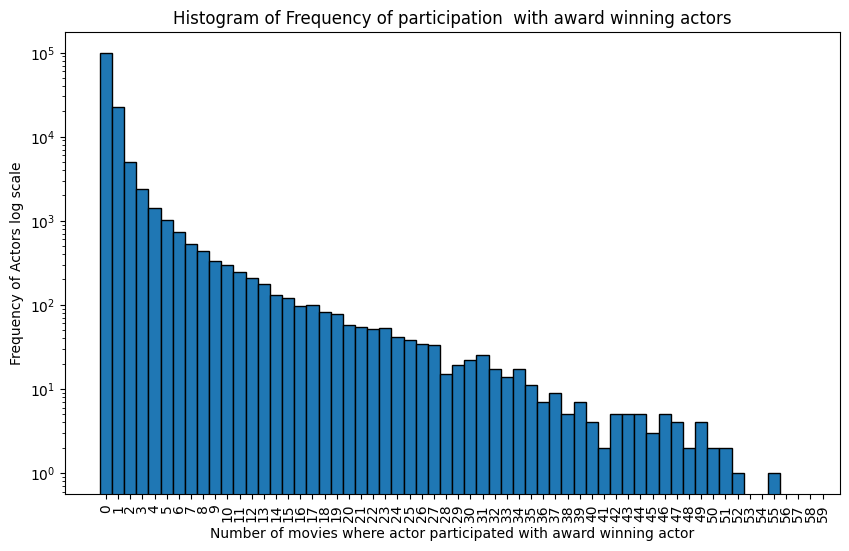

In [51]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(actors_to_compare["movies_with_actor_won_count"], bins=range(0, actors_to_compare["movies_with_actor_won_count"].max() ), edgecolor='black', align='left', log= True)
plt.title("Histogram of Frequency of participation  with award winning actors")
plt.xlabel("Number of movies where actor participated with award winning actor")
plt.ylabel("Frequency of Actors log scale")
plt.xticks(range(0, actors_to_compare["movies_with_actor_won_count"].max() + 1), rotation = 90)


Next we divide our actors to two different types:
- Actors that never participated with award winning actors
- Actors that participated at least once with award winning actors

In [52]:
no_participation = actors_to_compare[actors_to_compare["movies_with_actor_won_count"] <= 0]

participation =  actors_to_compare[actors_to_compare["movies_with_actor_won_count"] >= 1]

In [53]:
print("Never participated length: ", str(len(no_participation)))
print("Participated length: ", str(len(participation)))

Never participated length:  98730
Participated length:  36226


The Number of actors that did not participate with award winning actors is 2.7 times larger than the number of actors that participated which seems reasonable

We have decided to rank the success of actors based on the box office revenue and popularity of the movies they have participated in. These success factors will serve as a starting point for the measures we will use in Milestone 3 to compare the success of different actors

In [54]:
# We store the movies available in the success_factors dataframe
success_factors = revenues_ratings_df[["freebase_id","boxOffice_revenue","popularity"]]

success_factors


,freebase_id,boxOffice_revenue,popularity
0,/m/03vyhn,14010832.0,13.057
1,/m/02qc0j7,3600000.0,2.030
3,/m/016ywb,10161099.0,10.290
7,/m/0kcn7,102272727.0,31.512
8,/m/02wjqm,21521.0,8.734
...,...,...,...
78726,/m/08vpp2,NaN,1.288
78727,/m/0gvsf4t,NaN,0.621
78729,/m/047g4zk,NaN,16.030
78731,/m/0bmj7yy,NaN,0.841


In [55]:
# Explode the freebase_id list in no_participation to create individual rows for each freebase_id
no_participation_exploded = no_participation.explode('freebase_id')

# We do this merge to add the popularity and boxOffice revenue columns 
joined_df = pd.merge(no_participation_exploded, success_factors, on='freebase_id', how='inner')

filtered_df = joined_df[joined_df[['boxOffice_revenue', 'popularity']].notna().all(axis=1)]

# Grouping by actor ID and calculating the average for boxOffice_revenue, popularity
average_stats_no_participation = filtered_df.groupby('Freebase actor ID').agg({
    'boxOffice_revenue': 'mean',
    'popularity': 'mean',
}).reset_index()

print(average_stats_no_participation)


      Freebase actor ID  boxOffice_revenue  popularity
0              /m/011_8         47735246.5     12.6755
1             /m/011vx3          6300000.0      5.4890
2             /m/011xl3         24217115.0     12.0280
3             /m/011xll         24217115.0     12.0280
4             /m/011zg9         27645491.0     14.7080
...                 ...                ...         ...
14524          /m/0qf3p          3942254.0     12.1430
14525          /m/0sw7b        527071022.0     70.5160
14526           /m/0x3n         68257935.0     22.2450
14527          /m/0x7ml          1398424.0      4.7090
14528          /m/0y8r3          6325313.0     10.0960

[14529 rows x 3 columns]


In [56]:
# Explode the freebase_id list in no_participation to create individual rows for each freebase_id
participation_exploded = participation.explode('freebase_id')

# We do this merge to add the popularity and boxOffice revenue columns 
joined_df = pd.merge(participation_exploded, success_factors, on='freebase_id', how='inner')

filtered_df = joined_df[joined_df[['boxOffice_revenue', 'popularity']].notna().all(axis=1)]

# Grouping by actor ID and calculating the average boxOffice_revenue
average_stats_participation = filtered_df.groupby('Freebase actor ID').agg({
    'boxOffice_revenue': 'mean',
    'popularity': 'mean',
}).reset_index()

print(average_stats_participation)


      Freebase actor ID  boxOffice_revenue  popularity
0              /m/010p3       2.441991e+07    9.306000
1             /m/010q36       2.879282e+08   41.572000
2             /m/0112yl       1.831698e+07   12.125857
3             /m/011_3s       4.400251e+07   14.528900
4             /m/011_pk       5.885000e+05    1.934000
...                 ...                ...         ...
23070          /m/0sx5w       4.123080e+07   10.705000
23071           /m/0tj9       2.982673e+07    9.382826
23072          /m/0y58x       6.081960e+07   17.926500
23073          /m/0z05l       1.052788e+08   19.577900
23074          /m/0zcb7       1.364197e+07    5.278500

[23075 rows x 3 columns]


In [57]:
average_stats_participation.describe()

,boxOffice_revenue,popularity
count,2.307500e+04,23075.000000
mean,7.163476e+07,17.942824
std,1.226331e+08,19.088819
min,1.000000e+00,0.600000
25%,8.161345e+06,9.247000
50%,3.225544e+07,13.699857
75%,8.327532e+07,20.505167
max,2.782275e+09,363.431000


In [58]:
average_stats_no_participation.describe()


,boxOffice_revenue,popularity
count,1.452900e+04,14529.000000
mean,2.959545e+07,13.901735
std,6.655312e+07,16.007292
min,1.000000e+00,0.600000
25%,1.359257e+06,5.730000
50%,7.120939e+06,9.862000
75%,2.519625e+07,16.077000
max,7.696795e+08,404.473000


From the results above, we can see that the average and median box office revenue and popularity are higher for actors who have participated in projects with award winners. This outcome is logical, as the increased exposure these actors received from collaborating with award-winning individuals may account for the observed differences

In [59]:
df_stats_no_participation = pd.DataFrame(average_stats_no_participation)
df_stats_participation_ = pd.DataFrame(average_stats_participation)

In [60]:
t_stat, p_val = stats.ttest_ind(df_stats_no_participation['boxOffice_revenue'], df_stats_participation_['boxOffice_revenue'], alternative='less', equal_var=False)
# We set equal_var to False because we do not assume that the variances of the two samples are equal
print("tstat =", t_stat)
print("The p-value for the one-sided test is %.03f." % p_val)
bool_val = p_val < 0.05

if bool_val:
    conclusion = "reject"
else:
    conclusion = "fail to reject"

print(f"Since the p-value is {p_val:.03f} and {'is' if bool_val else 'is not'} less than 0.05, we {conclusion} the null hypothesis that the mean of average revenue per actor not participating with award winner is greater than or equal to the average revenue per actor participating.")


tstat = -42.98238367355803
The p-value for the one-sided test is 0.000.
Since the p-value is 0.000 and is less than 0.05, we reject the null hypothesis that the mean of average revenue per actor not participating with award winner is greater than or equal to the average revenue per actor participating.


In [61]:
t_stat, p_val = stats.ttest_ind(df_stats_no_participation['popularity'], df_stats_participation_['popularity'], alternative='less', equal_var=False)
# We set equal_var to False because we do not assume that the variances of the two samples are equal
print("tstat =", t_stat)
print("The p-value for the one-sided test is %.03f." % p_val)
bool_val = p_val < 0.05
if bool_val:
    conclusion = "reject"
else:
    conclusion = "fail to reject"

print(f"Since the p-value is {p_val:.03f} and {'is' if bool_val else 'is not'} less than 0.05, we {conclusion} the null hypothesis that the mean of average popularity per actor not participating with award winner is greater than or equal to the average popularity per actor participating.")


tstat = -22.102841648264032
The p-value for the one-sided test is 0.000.
Since the p-value is 0.000 and is less than 0.05, we reject the null hypothesis that the mean of average popularity per actor not participating with award winner is greater than or equal to the average popularity per actor participating.


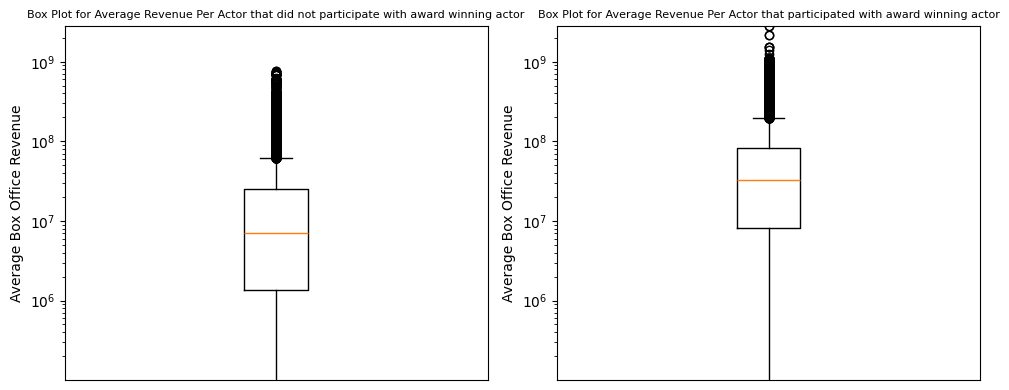

In [62]:
# Calculate the minimum and maximum values for the y-axis, considering only values > 10^5
# These were done for better visualisation
min_rev = max(10**5, df_stats_no_participation['boxOffice_revenue'][df_stats_no_participation['boxOffice_revenue'] > 10**5].min(), 
              df_stats_participation_['boxOffice_revenue'][df_stats_participation_['boxOffice_revenue'] > 10**5].min())
max_rev = max(df_stats_no_participation['boxOffice_revenue'].max(), df_stats_participation_['boxOffice_revenue'].max())

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df_stats_no_participation['boxOffice_revenue'])
plt.title('Box Plot for Average Revenue Per Actor that did not participate with award winning actor', fontsize=8)
plt.xticks([])  

plt.ylabel('Average Box Office Revenue')
plt.yscale('log')  # Applying logarithmic scale to y-axis
plt.ylim(min_rev, max_rev)  

plt.subplot(1, 2, 2)
plt.boxplot(df_stats_participation_['boxOffice_revenue'])
plt.title('Box Plot for Average Revenue Per Actor that participated with award winning actor', fontsize=8)
plt.ylabel('Average Box Office Revenue')
plt.yscale('log')  # Applying logarithmic scale to y-axis
plt.ylim(min_rev, max_rev)  

plt.xticks([])  


plt.tight_layout()
plt.show()


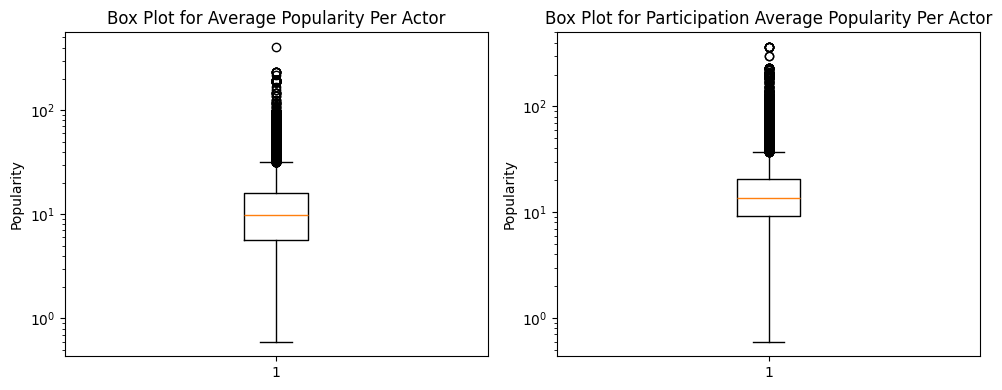

In [63]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df_stats_no_participation['popularity'])
plt.title('Box Plot for Average Popularity Per Actor')
plt.ylabel('Popularity')
plt.yscale('log') # Applying logarithmic scale to y-axis

plt.subplot(1, 2, 2)
plt.boxplot(df_stats_participation_['popularity'])
plt.title('Box Plot for Participation Average Popularity Per Actor')
plt.ylabel('Popularity')
plt.yscale('log')   # Applying logarithmic scale to y-axis

plt.tight_layout()
plt.show()


The t-tests and box plots confirm the results obtained previously when we analyzed the dataframes. Both the popularity and the box office revenues are statistically significantly higher for actors who have participated with award-winning actors. These results seem logical; collaborating with award-winning actors, who possess proven talents, likely increases the popularity of the movies. At the same time, these movies may also reach a broader audience, which could be a reason for the higher box office revenues

After all these results provide a starting point to answering the research questions treating the impact of co_starring with high-profile actors 



### Spotlight to Stardom: The Ripple Effect of Awards on Actors' Careers

In [64]:
# Sort the DataFrame by 'FreebaseActorID' and 'year_ceremony'
actor_awards_sorted = actor_awards.sort_values(by=['Freebase actor ID', 'year_ceremony'])

# Now apply groupby and first
first_awards = actor_awards_sorted.groupby('Freebase actor ID').first().reset_index()
first_awards

,Freebase actor ID,year_film,year_ceremony,ceremony,category,name,film,winner,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor birth year,title,freebase_id,won,nominations
0,/m/010xjr,1963,1964,36,ACTOR,Richard Harris,This Sporting Life,False,1930-10-01,M,1.85,/m/03bkbh,Richard Harris,1930.0,This Sporting Life,"[/m/0c_6bf, /m/078mm1, /m/03qfyt, /m/0cz7_4w, ...",1,2
1,/m/011_3s,1975,1976,33,Best Performance by an Actress in a Supporting...,Lily Tomlin,Nashville,False,1939-09-01,F,1.73,None,Lily Tomlin,1939.0,Nashville,"[/m/0mdlf, /m/0615_9, /m/027qjyd, /m/027qjyd, ...",0,4
2,/m/011_c4,1966,1967,39,ACTRESS IN A SUPPORTING ROLE,Vivien Merchant,Alfie,False,1929-07-22,F,NaN,None,Vivien Merchant,1929.0,Alfie,"[/m/05bzsr6, /m/0281z4, /m/02pp0b5, /m/0p7pw, ...",0,1
3,/m/011_nf,1928,1929,2,ACTOR,Warner Baxter,In Old Arizona,True,1889-03-29,M,NaN,None,Warner Baxter,1889.0,In Old Arizona,"[/m/03cbvzw, /m/026_y0f, /m/0c5vz, /m/0ggb04k,...",1,1
4,/m/011_pk,1928,1929,2,ACTOR,Chester Morris,Alibi,False,1901-02-16,M,NaN,None,Chester Morris,1901.0,Alibi,"[/m/0b4bp1l, /m/04crf3k, /m/09gg05s, /m/09gj2h...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,/m/0sz28,1993,1994,51,Best Performance by an Actor in a Supporting R...,Sean Penn,Carlito's Way,False,1960-08-17,M,1.77,/m/041rx,Sean Penn,1960.0,Carlito's Way,"[/m/02rj2v7, /m/02qh42w, /m/02pzx0n, /m/03md68...",3,10
1210,/m/0tc7,1976,1977,34,New Star Of The Year - Actor,Arnold Schwarzenegger,Stay Hungry,True,1947-07-30,M,1.88,/m/019lrz,Arnold Schwarzenegger,1947.0,Stay Hungry,"[/m/0kvds4, /m/07tr5g, /m/08ck1h, /m/053rxgm, ...",1,2
1211,/m/0ywqc,1980,1981,38,Best Performance by an Actor in a Motion Pictu...,Donald Sutherland,Ordinary People,False,1935-07-17,M,1.93,/m/07bch9,Donald Sutherland,1935.0,Ordinary People,"[/m/0dcjzb, /m/02vxyq9, /m/0h1d4kn, /m/01vg4x,...",2,5
1212,/m/0z4s,1978,1979,36,Best Performance by an Actor in a Motion Pictu...,Anthony Hopkins,Magic,False,1937-12-31,M,1.74,/m/02g7sp,Anthony Hopkins,1937.0,Magic,"[/m/035bcl, /m/03mczbc, /m/07wzcn, /m/0cc7mcr,...",1,8


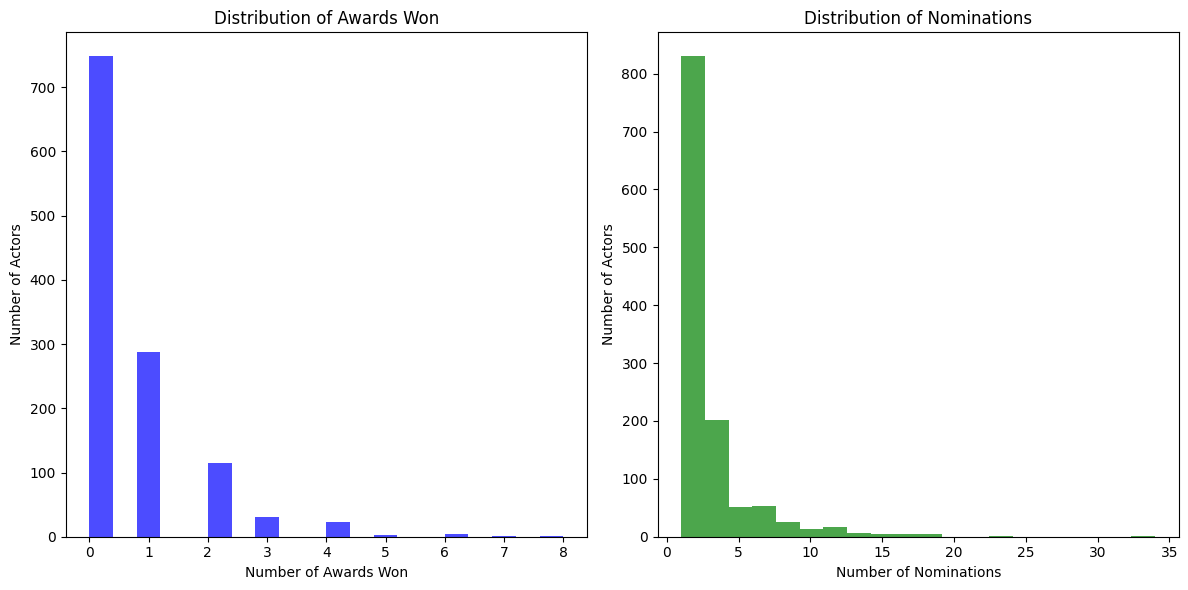

In [65]:
# Set up the figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for awards won
plt.subplot(1, 2, 1)
plt.hist(first_awards['won'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Awards Won')
plt.xlabel('Number of Awards Won')
plt.ylabel('Number of Actors')

# Histogram for nominations
plt.subplot(1, 2, 2)
plt.hist(first_awards['nominations'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Number of Actors')

# Show the plot
plt.tight_layout()
plt.show()

In [66]:
characters_metadata_df

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Actor birth year
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26 00:00:00+00:00,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,1958.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15 00:00:00+00:00,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,1974.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15 00:00:00+00:00,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,1969.0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12 00:00:00+00:00,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,1967.0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25 00:00:00+00:00,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,1977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,NaT,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,NaN
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12 00:00:00+00:00,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1965.0
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18 00:00:00+00:00,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1941.0
450667,28308153,/m/0cp05t9,1957,NaN,NaT,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,NaN


In [67]:
movies_characters_df = revenues_ratings_df.merge(characters_metadata_df,left_on='freebase_id',right_on='Freebase movie ID',how='inner')

In [68]:
movies_characters_df = movies_characters_df.merge(first_awards,on='Freebase actor ID',how='inner')

In [69]:
before_award_df = movies_characters_df[movies_characters_df['year'] < movies_characters_df['year_ceremony']]
before_award_df

,id,freebase_id_x,title_x,release_date,boxOffice_revenue,runtime,language,country,genres_x,year,...,Actor date of birth_y,Actor gender_y,Actor height_y,Actor ethnicity_y,Actor name_y,Actor birth year_y,title_y,freebase_id_y,won,nominations
3,6021280,/m/0fkzvz,Scream Blacula Scream,1973-06-27,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03btsm8"": ""Action/Adv...",1973.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
4,5578994,/m/0dtj7w,The Package,1989-08-25,10647219.0,108.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",1989.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
5,394792,/m/0234j5,Jackie Brown,1997-12-25,39673162.0,151.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",1997.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
6,24165886,/m/07kb094,Tough Enough,1983-04-14,NaN,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z02hx"": ""Sports"", ""/m/02l7c8"": ""Romance...",1983.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
7,2066600,/m/06jrs3,Coffy,1973-06-13,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",1973.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22215,772823,/m/03b9b8,Dead Again,1991-08-23,38016380.0,108.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02n4kr"": ""Mystery""}",1991.0,...,1953-04-06,M,NaN,/m/03lmx1,Patrick Doyle,1953.0,Dead Again,"[/m/03b9b8, /m/0bhn38]",0,1
22217,61173,/m/0glq0,One Night of Love,1934-09-05,2500000.0,83.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/09c7w0"": ""United States of America""}","{""/m/068d7h"": ""Romantic drama"", ""/m/04t36"": ""M...",1934.0,...,1898-12-05,F,1.620,None,Grace Moore,1898.0,One Night of Love,"[/m/0glq0, /m/07s44nh, /m/0bqtblk, /m/03g_prd,...",0,1
22220,725468,/m/035ypg,Murder by Death,1976-06-23,32511047.0,94.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0gf28"": ""Parody"", ""/m/01jfsb"": ""Thriller""...",1976.0,...,1924-09-30,M,NaN,None,Truman Capote,1924.0,Murder by Death,[/m/035ypg],0,1
22221,80488,/m/0ktpx,Spellbound,1945-10-31,7000000.0,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06pqf08"": ""Theri...",1945.0,...,1891-08-29,M,NaN,None,Michael Chekhov,1891.0,Spellbound,"[/m/0ktpx, /m/076wrlv, /m/03h3vcr, /m/0g3hvy]",0,1


In [70]:
after_award_df = movies_characters_df[movies_characters_df['year'] > movies_characters_df['year_ceremony']]
after_award_df

,id,freebase_id_x,title_x,release_date,boxOffice_revenue,runtime,language,country,genres_x,year,...,Actor date of birth_y,Actor gender_y,Actor height_y,Actor ethnicity_y,Actor name_y,Actor birth year_y,title_y,freebase_id_y,won,nominations
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
1,24021571,/m/07kbj2s,Just Wright,2010-05-14,21570263.0,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/01z02hx"": ...",2010.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
2,2352505,/m/075ym7,Bones,2001-10-26,7316658.0,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/018td"": ""Blaxploitation"", ""/m/02kdv5l"": ""...",2001.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
8,3583342,/m/09n0nb,Jawbreaker,1999-02-19,3076820.0,87.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0vgkd"": ""Black comedy"", ""/m/06nbt"": ""Sati...",1999.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
9,3137903,/m/08tw1f,In Too Deep,1999-08-25,14011454.0,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",1999.0,...,1949-05-26,F,1.727,/m/0x67,Pam Grier,1949.0,Jackie Brown,"[/m/03vyhn, /m/07kbj2s, /m/026y7wg, /m/075ym7,...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22200,23780420,/m/06zt66y,Killer Instinct,1988-11-22,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",1988.0,...,1964-05-08,F,1.600,/m/041rx,Melissa Gilbert,1964.0,Little House on the Prairie,"[/m/04m_35x, /m/06_vf23, /m/06zrz70, /m/05zrsz...",0,1
22204,27638152,/m/05q9kpt,Waiting for Forever,2010-02-10,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/068d7h"": ""...",2010.0,...,1988-11-09,F,1.470,/m/041rx,Nikki Blonsky,1988.0,Hairspray,"[/m/03cf4lv, /m/05p46dv, /m/02wvxc3, /m/0bt3j9...",0,1
22209,22069255,/m/05nzsmn,Prisoners of the Lost Universe,1983-08-15,NaN,94.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",1983.0,...,1945-05-21,M,1.800,None,Richard Hatch,1945.0,Battlestar Galactica,"[/m/0bmd3xf, /m/05nzsmn, /m/08mkh9, /m/09hmxq,...",0,1
22218,23741959,/m/06zpdq7,Louise,1939-08-24,NaN,86.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France""}","{""/m/04t36"": ""Musical"", ""/m/03q4nz"": ""World ci...",1939.0,...,1898-12-05,F,1.620,None,Grace Moore,1898.0,One Night of Love,"[/m/0glq0, /m/07s44nh, /m/0bqtblk, /m/03g_prd,...",0,1


**Award Influence Analysis**

Analyzing movie metrics before and after an actor wins an award can reveal insights into the award's influence on their career and the success of the films they participate in. 

**Observations**:

1. **Revenue Increase Post Award**: The first below plot indicates a potential increase in box office revenue following an award win. This suggests that awards can enhance an actor's marketability and the financial performance of their films.

2. **Increased Voter Participation**: The second plot shows more people participating in voting for the movie rating on IMDb following an award win, indicating heightened audience engagement.

3. **Change in Rating Quality**: Despite the increased voter participation, the third plot indicates a decrease in average ratings post-award. This could imply higher audience expectations and standards for movies featuring award-winning actors, leading to more critical assessments.

4. **Popularity Surge**: The fourth plot highlights an increase in the popularity score after an award win, aligning with the notion that awards boost an actor's public visibility and appeal.

**Forward Look**:

While these observations are intriguing, they necessitate further statistical analysis to establish a causal relationship. In the upcoming milestone 3, we will delve deeper into statistical tests to confirm these findings. This initial analysis lays the groundwork for understanding the impact of awards on an actor's professional success and their films' performance.


In [71]:
# Compute the mean vote average and box office revenue for actors before and after awards
after_means = after_award_df.groupby('Freebase actor ID')[['vote_average', 'boxOffice_revenue','vote_count','popularity']].mean()
before_means = before_award_df.groupby('Freebase actor ID')[['vote_average', 'boxOffice_revenue','vote_count','popularity']].mean()

In [72]:
before_means['popularity'].mean()

11.068025184811418

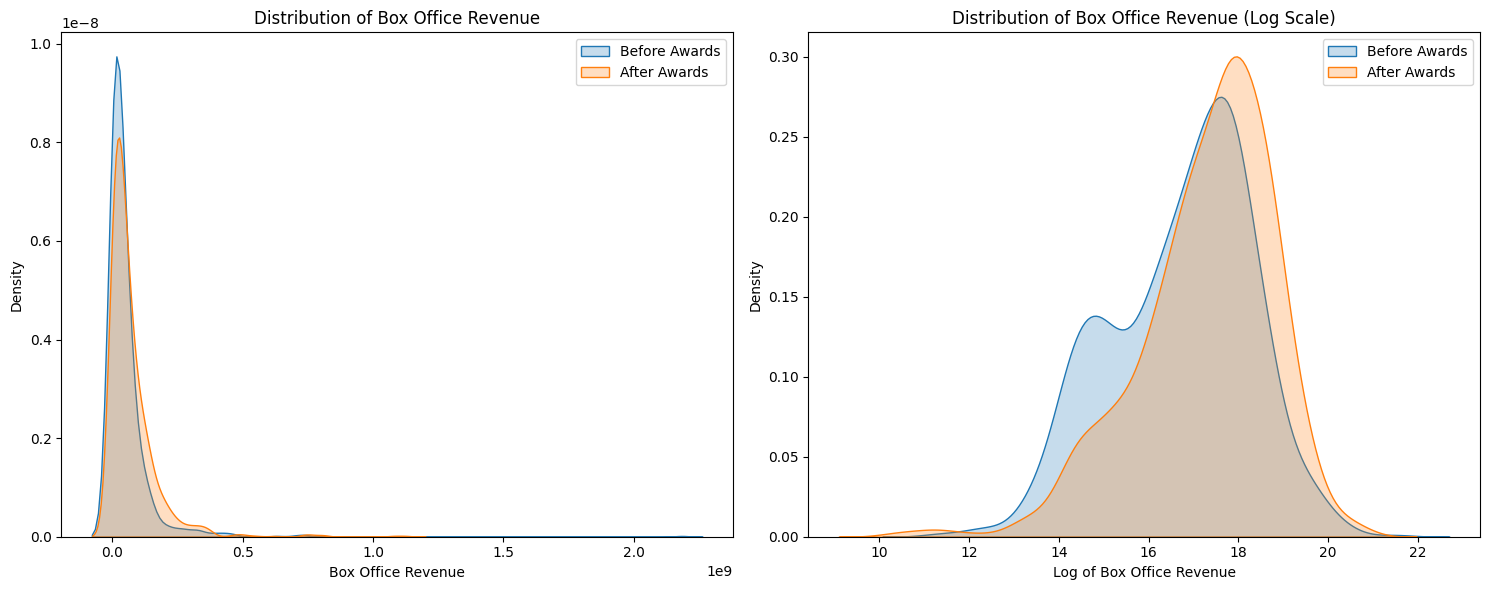

In [73]:
# Apply log transformation to box office revenue to handle wide range of values
after_means['log_boxOffice_revenue'] = np.log(after_means['boxOffice_revenue'] + 1) # Adding 1 to avoid log(0)
before_means['log_boxOffice_revenue'] = np.log(before_means['boxOffice_revenue'] + 1)

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot distribution of vote averages before and after awards
# Plot distribution of box office revenue before and after awards
plt.subplot(1, 2, 1)
sns.kdeplot(before_means['boxOffice_revenue'], label='Before Awards', shade=True)
sns.kdeplot(after_means['boxOffice_revenue'], label='After Awards', shade=True)
plt.title('Distribution of Box Office Revenue')
plt.xlabel('Box Office Revenue')
plt.ylabel('Density')
plt.legend()

# Plot distribution of log-transformed box office revenue before and after awards
plt.subplot(1, 2, 2)
sns.kdeplot(before_means['log_boxOffice_revenue'], label='Before Awards', shade=True)
sns.kdeplot(after_means['log_boxOffice_revenue'], label='After Awards', shade=True)
plt.title('Distribution of Box Office Revenue (Log Scale)')
plt.xlabel('Log of Box Office Revenue')
plt.ylabel('Density')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


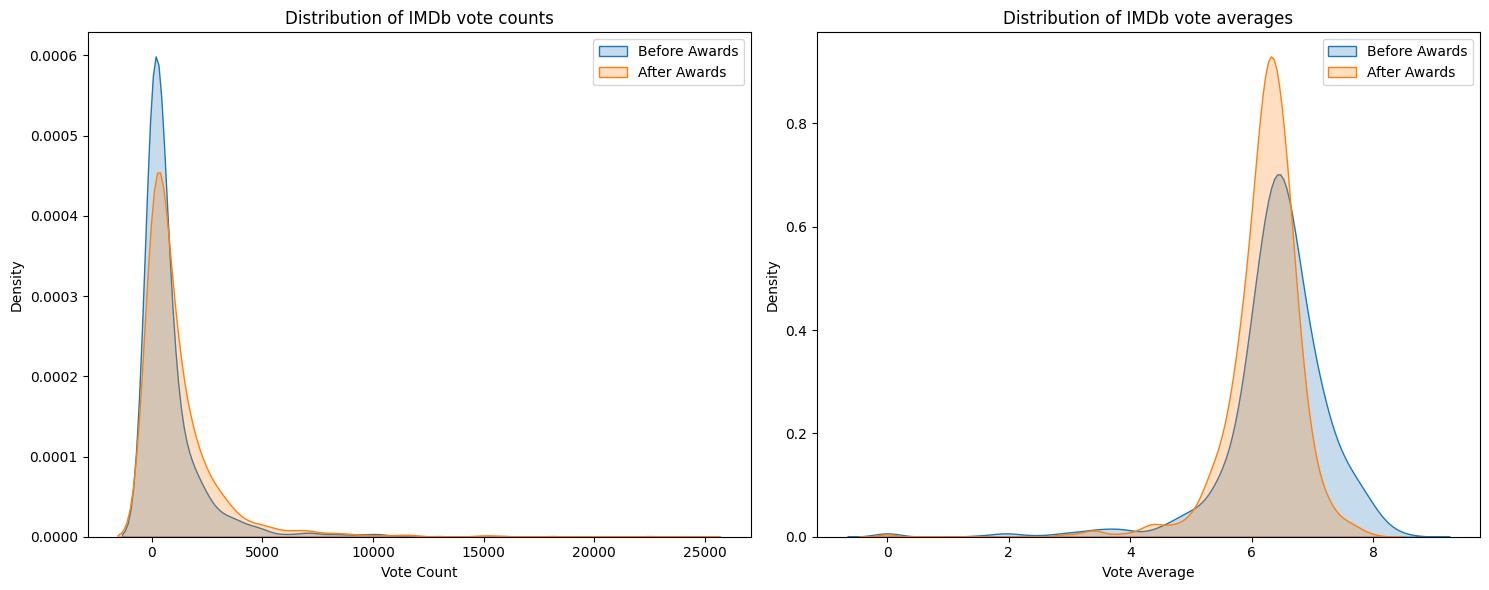

In [74]:

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot distribution of vote averages before and after awards
# Plot distribution of box office revenue before and after awards
plt.subplot(1, 2, 1)
sns.kdeplot(before_means['vote_count'], label='Before Awards', shade=True)
sns.kdeplot(after_means['vote_count'], label='After Awards', shade=True)
plt.title('Distribution of IMDb vote counts')
plt.xlabel('Vote Count')
plt.ylabel('Density')
plt.legend()

# Plot distribution of log-transformed box office revenue before and after awards
plt.subplot(1, 2, 2)
sns.kdeplot(before_means['vote_average'], label='Before Awards', shade=True)
sns.kdeplot(after_means['vote_average'], label='After Awards', shade=True)
plt.title('Distribution of IMDb vote averages')
plt.xlabel('Vote Average')
plt.ylabel('Density')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

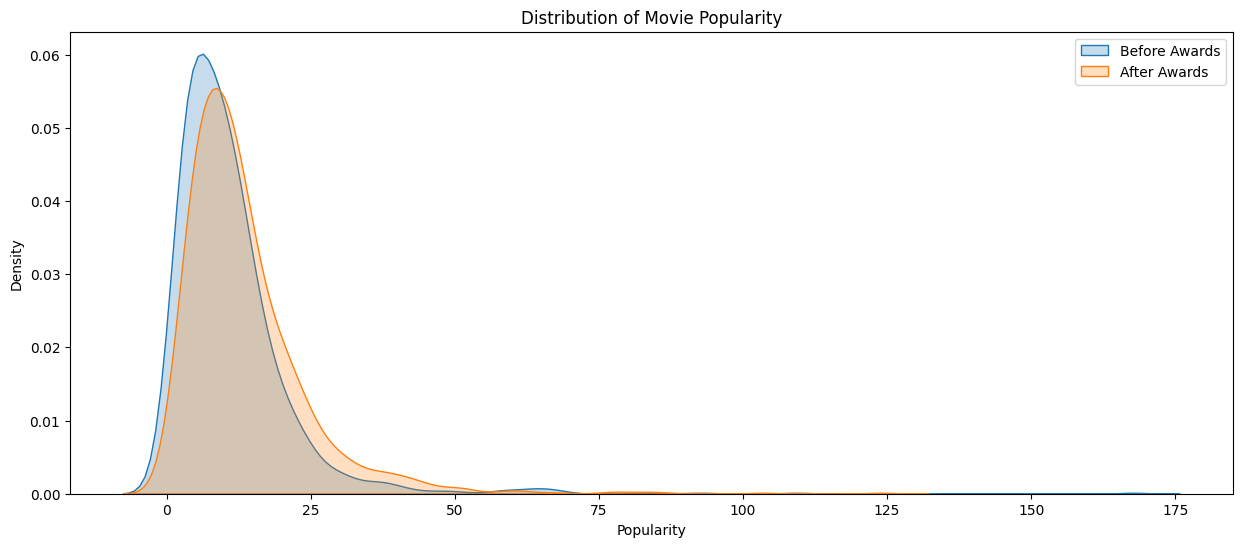

In [75]:
plt.figure(figsize=(15, 6))

sns.kdeplot(before_means['popularity'], label='Before Awards', shade=True)
sns.kdeplot(after_means['popularity'], label='After Awards', shade=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.legend()

### Cultural Canvases on the Global Screen

In [77]:
!pip install SPARQLWrapper

zsh:1: command not found: pip


In [78]:
actor_movies_copy_df = actor_movies_df.copy()

#Remove duplicates to avoid querying the same IDs multiple times
unique_ids = actor_movies_copy_df['Actor ethnicity'].drop_duplicates()

#Apply the function to the unique IDs
#This creates a Series with Freebase IDs as the index and Q-numbers as the values
q_numbers = unique_ids.apply(query_wikidata_for_qnumber)

#We also need it as dictionary to map back to the original dataframe
q_numbers_dict = {unique_ids.iloc[i]: q_numbers.iloc[i] for i in range(len(unique_ids))}

#Apply the function to Q-numbers
#We create a dictionary where the keys are the Q-numbers obtained from the previous step and the values are the
#corresponding ethnicities obtained by querying Wikidata. We use a dictionary to map ethnicities back to the original
#dataFrame using the Q-numbers as keys
ethnicity_dict = {q_nb: get_ethnicity_from_wikidata(q_nb) for q_nb in q_numbers}

In [79]:
#Mapping back to the original dataframe
actor_movies_copy_df['q_number'] = actor_movies_copy_df['Actor ethnicity'].map(q_numbers_dict)
actor_movies_copy_df['Actor ethnicity 2'] = actor_movies_copy_df['q_number'].map(ethnicity_dict)
#Setting the ethnicity to NaN if the original dataframe had NaN values in the unique IDs column
#We do this to differenciate between the NaNs and the IDs that were not found in Wikidata which we map to "Other Ethnicities"
actor_movies_copy_df['Actor ethnicity 2'] = np.where(actor_movies_copy_df['Actor ethnicity'].isna(), np.nan, actor_movies_copy_df['Actor ethnicity 2'])

In [80]:
#Merge to add 'Actor ethnicity 2' to 'actor_movies_df' instead of 'Actor ethnicity' which only had the unique IDs, and rename it
actor_movies_df = actor_movies_df.merge(actor_movies_copy_df[['Actor name', 'Actor ethnicity 2']], on='Actor name', how='left')
actor_movies_df = actor_movies_df.drop('Actor ethnicity', axis=1)
actor_movies_df = actor_movies_df.rename(columns={'Actor ethnicity 2': 'Actor ethnicity'})

**Top 10 Ethnicities in terms of number of actors**

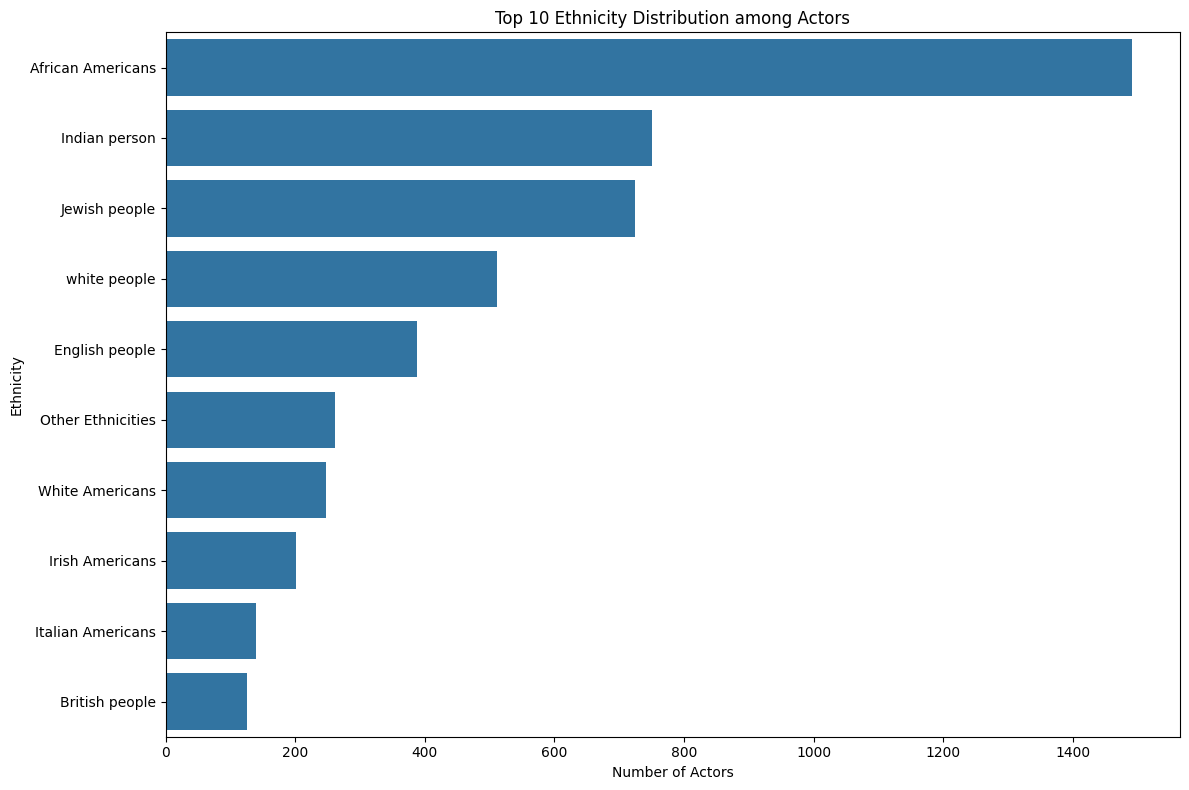

In [81]:
top10_ethnicities = actor_movies_df['Actor ethnicity'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_ethnicities.values, y=top10_ethnicities.index)
plt.title('Top 10 Ethnicity Distribution among Actors')
plt.xlabel('Number of Actors')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()

Immediately we notice a huge overlap between some of the ethnicities (for example white people and White Americans). This will be tackled by clustering these ethnicities into more extensive ones in Milestone 3.

**Average Movie Revenue per Actor per Ethnicity**

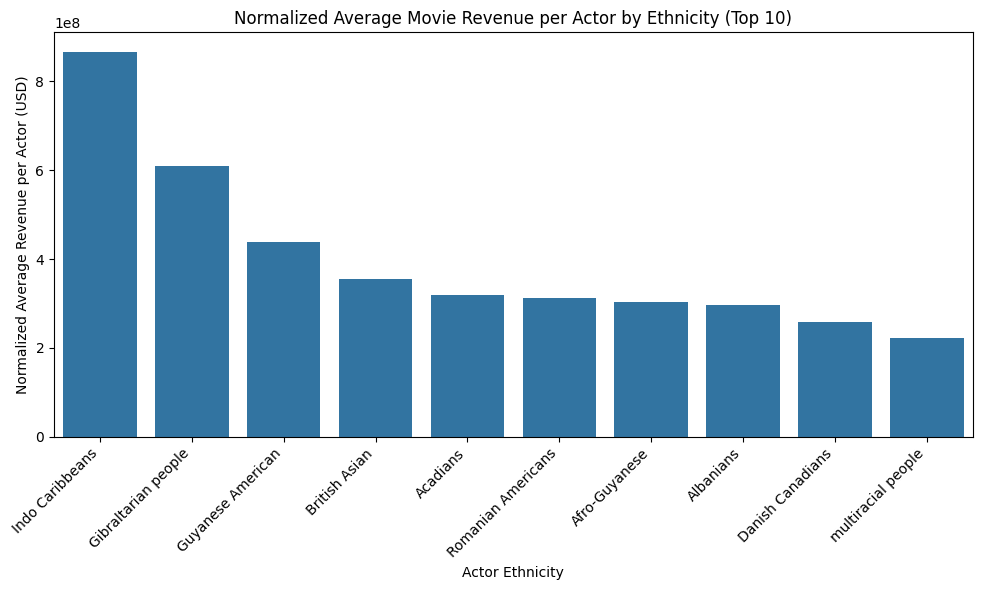

In [82]:
#We make a copy of the dataframes we want to use: one for actors and one for movies (revenues and ratings)
actors_copy_df = actor_movies_df.copy()
revenues_ratings_copy_df = revenues_ratings_df.copy().drop_duplicates(subset=['freebase_id'])

#We explode the dataframe so each row corresponds to an actor-movie pair instead of one movie list for each actor
actors_exploded_df = actors_copy_df.explode('title')
merged_df = pd.merge(actors_exploded_df, revenues_ratings_copy_df, left_on='title', right_on='title', how='inner')
average_revenue_by_ethnicity = merged_df.groupby('Actor ethnicity')['boxOffice_revenue'].mean().reset_index()

#We make a copy of merged_df to drop duplicate actors and count how many actors we have in each ethnicity AFTER merging the dataframes
merged_df_copy = merged_df.copy()
merged_df_copy = merged_df_copy.drop_duplicates(subset=['Freebase actor ID'])
total_actors_per_ethnicity = merged_df_copy.groupby('Actor ethnicity').size().reset_index(name='actor_count')

#We normalize (divide by number of actors in each ethnicity) to avoid the results being skewed by the number of actors in ethnicity groups
merged_ethnicity_data = pd.merge(average_revenue_by_ethnicity, total_actors_per_ethnicity, on='Actor ethnicity')
merged_ethnicity_data['normalized_revenue'] = merged_ethnicity_data['boxOffice_revenue'] / merged_ethnicity_data['actor_count']
merged_ethnicity_data = merged_ethnicity_data.sort_values(by='normalized_revenue', ascending=False)

plt.figure(figsize=(10, 6))
normalized_barplot = sns.barplot(x='Actor ethnicity', y='normalized_revenue', data=merged_ethnicity_data.head(10))
normalized_barplot.set_xticklabels(normalized_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Normalized Average Movie Revenue per Actor by Ethnicity (Top 10)')
plt.xlabel('Actor Ethnicity')
plt.ylabel('Normalized Average Revenue per Actor (USD)')
plt.tight_layout()
plt.show()

This code is a preliminary analysis of whether an actor's ethnicity influences a movie's box office success. By comparing average revenues of movies featuring actors from different ethnicities and then adjusting these averages based on the number of actors in each group, we aim to see whether some ethnicities are associated with higher revenues in a more equitable and representative way.
From the plot, we can see that the highest revenue per actor is associated to the Bristish Asian ethnicity.


But we notice that the actor counts for these ethnicities are very low (9/10 are just 2 or 1). Therefore, we will introduce a cut-off point. We will require at least 10 actors from one ethnicity for the ethnicity to be considered in this part of our analysis:

In [83]:
#We filter to include only ethnicities with more than 10 occurrences
total_actors_per_ethnicity_min_10 = total_actors_per_ethnicity[total_actors_per_ethnicity['actor_count'] > 10]

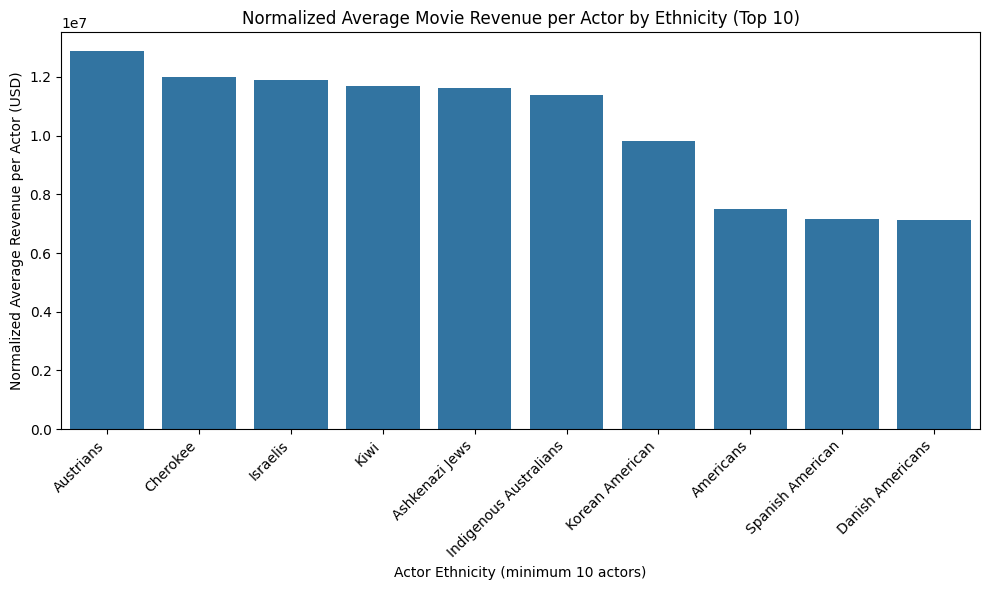

In [84]:
merged_ethnicity_data_filtered = merged_ethnicity_data[merged_ethnicity_data['Actor ethnicity'].isin(total_actors_per_ethnicity_min_10['Actor ethnicity'])].head(10)

plt.figure(figsize=(10, 6))
normalized_barplot = sns.barplot(x='Actor ethnicity', y='normalized_revenue', data=merged_ethnicity_data_filtered.head(10))

# Improve the readability of the plot
normalized_barplot.set_xticklabels(normalized_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Normalized Average Movie Revenue per Actor by Ethnicity (Top 10)')
plt.xlabel('Actor Ethnicity (minimum 10 actors)')
plt.ylabel('Normalized Average Revenue per Actor (USD)')
plt.tight_layout()
plt.show()

- These graphs above are a comparison of average movie revenue per actor before and after applying a filter for a minimum of ten actors per ethnicity. It's important to study this because it helps us understand the commercial impact of having actors of different ethnicities in movies. From the first to the second graph, we see a change in which ethnicities appear, suggesting that some groups have fewer actors but still a significant impact on revenue (probably irrelevant due to sample size). 
- However, because the analysis is not highly conclusive, it's a starting point that indicates the need for a more in-depth look at diversity in film and its economic implications. It shows a glimpse of the potential market performance of movies with diverse casts but requires further study to draw strong conclusions, which we will delve deep into in Milestone 3.

**Average Movie Rating by Ethnicity**

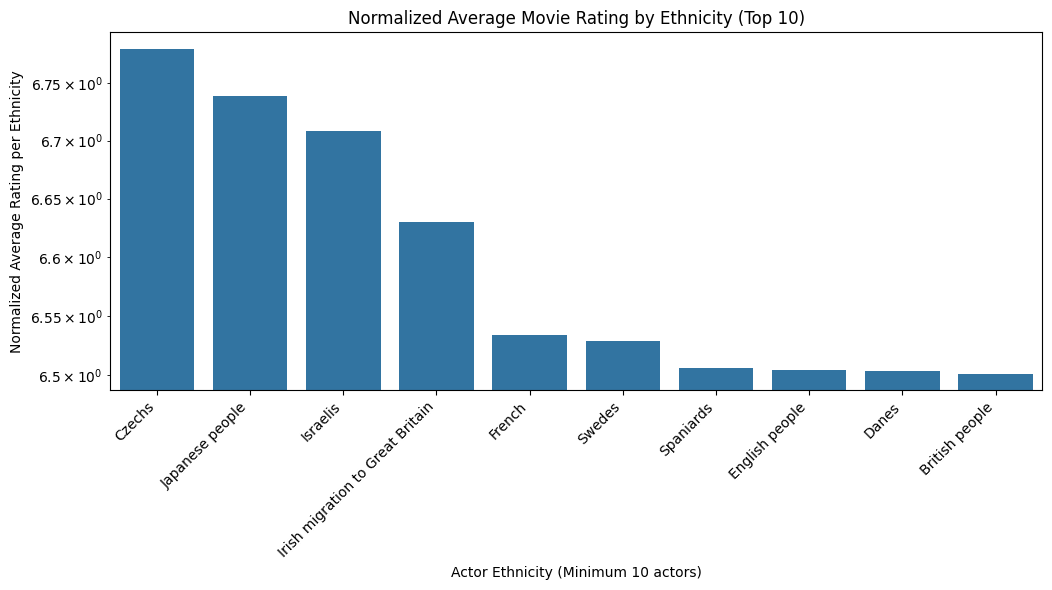

In [85]:
#Grouping by actor ethnicity, but only for ethnicities with more than 10 different actors
#We do this because some ethnicities have only 1 or 2 actors that participate in more than 10 movies
average_ratings_by_ethnicity = merged_df.groupby('Actor ethnicity')['averageRating'].mean().reset_index()
average_ratings_by_ethnicity_filtered = average_ratings_by_ethnicity[average_ratings_by_ethnicity['Actor ethnicity'].isin(total_actors_per_ethnicity_min_10['Actor ethnicity'])]
average_ratings_by_ethnicity_filtered = average_ratings_by_ethnicity_filtered.sort_values(by='averageRating', ascending=False)

plt.figure(figsize=(10, 6))
normalized_barplot = sns.barplot(x='Actor ethnicity', y='averageRating', data=average_ratings_by_ethnicity_filtered.head(10))

normalized_barplot.set_xticklabels(normalized_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Normalized Average Movie Rating by Ethnicity (Top 10)')
plt.xlabel('Actor Ethnicity (Minimum 10 actors)')
plt.ylabel('Normalized Average Rating per Ethnicity')
plt.tight_layout()
plt.yscale('log')
plt.show()

- The graph shows movie ratings linked to actors' ethnicities. This simple plot indicates that films with Czech actors get the best ratings, but other ethnicities are not far behind. This means people are enjoying movies with actors from different backgrounds in general.
- It is noteworthy to mention that we used a logarithmic scale on the y-axis because the ratings are very close to each other and the plot doesn't really show any value otherwise.

**Temporal Trends**

<Figure size 1500x800 with 0 Axes>

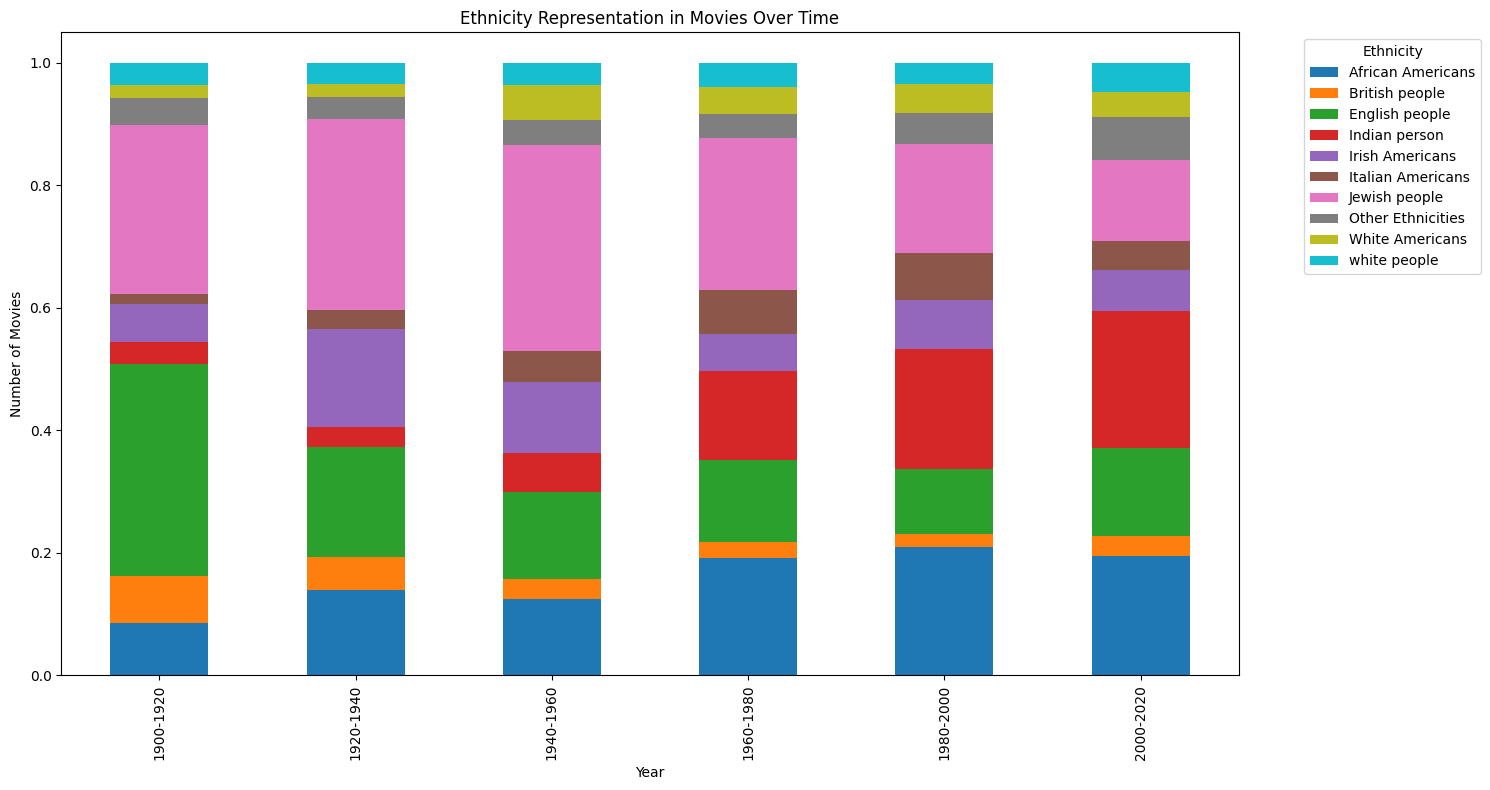

In [87]:
top5_merged_df = merged_df.copy()
top5_ethnicities = actor_movies_df['Actor ethnicity'].value_counts().head(10)

year_bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
year_labels = ['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']

top5_merged_df['year'] = pd.cut(top5_merged_df['year'], bins=year_bins, labels=year_labels)

top5_merged_df = top5_merged_df[top5_merged_df['Actor ethnicity'].isin(top5_ethnicities.index)]
yearly_ethnicity_trends = top5_merged_df.groupby(['year', 'Actor ethnicity']).size().unstack(fill_value=0)

normalized_ethnicity_distribution = yearly_ethnicity_trends.div(yearly_ethnicity_trends.sum(axis=1), axis=0)

plt.figure(figsize=(15, 8))
normalized_ethnicity_distribution.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Ethnicity Representation in Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

- We analyze the ethnicity representation in movies over time to track the progress of diversity and inclusivity in the film industry. It offers a visual insight into how the portrayal of various ethnic groups has changed, potentially reflecting shifts in societal attitudes and stereotypes. The chart indicates a trend towards greater diversity in recent decades, suggesting a response to increased awareness and demand for representation, which makes sense. 
- It is very important to note that the ethnicities given from the dataset can be clustered into more compact and inclusive ethnicities for better analysis, which we will be doing for milestone 3!

### Behind the Scenes Alchemy

**Collaboration with acclaimed directors and producers** can significantly shape an actor's career, often leading to greater visibility, access to diverse and challenging roles, and increased box office success.

In [88]:
movies_awards_df = revenues_ratings_df.merge(awards_df,
    right_on='film',
    left_on = 'title',                           
    how='left'
)
movies_awards_df

,id,freebase_id,title,release_date,boxOffice_revenue,runtime,language,country,genres_x,year,...,revenue,vote_average,vote_count,year_film,year_ceremony,ceremony,category,name,film,winner
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,...,14010832.0,5.154,911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,4000000.0,6.614,22.0,1938.0,1939.0,11.0,ART DIRECTION,"Bernard Herzbrun, Boris Leven",Alexander's Ragtime Band,False
2,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,4000000.0,6.614,22.0,1938.0,1939.0,11.0,FILM EDITING,Barbara McLean,Alexander's Ragtime Band,False
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,4000000.0,6.614,22.0,1938.0,1939.0,11.0,MUSIC (Scoring),Alfred Newman,Alexander's Ragtime Band,True
4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,4000000.0,6.614,22.0,1938.0,1939.0,11.0,MUSIC (Song),Music and Lyrics by Irving Berlin,Alexander's Ragtime Band,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27075,3150618,/m/08vpp2,The Greengage Summer,1961-04-04,NaN,99.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama"", ""/m/01j1n2"": ""Coming o...",1961.0,...,0.0,6.500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27076,31901248,/m/0gvsf4t,Cape Forlorn,1931-01-08,NaN,62.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,0.0,7.500,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27077,17789399,/m/047g4zk,Lesbian Vampire Killers,2009-03-20,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02jx1"": ""England"", ""/m/07ssc"": ""United Ki...","{""/m/0gf28"": ""Parody"", ""/m/02kdv5l"": ""Action"",...",2009.0,...,0.0,5.200,318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27078,26743619,/m/0bmj7yy,The Calendar,1931-10-31,NaN,80.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
movies_awards_df['releaseDiff3'] = (movies_awards_df['year_film'] - movies_awards_df['year']).abs()
movies_awards_df = movies_awards_df[(movies_awards_df['releaseDiff3'] <= 1) | (movies_awards_df['releaseDiff3'].isna())]
movies_awards_df= movies_awards_df.drop(columns= ['releaseDiff3','isAdult'],axis=1)
movies_awards_df

,id,freebase_id,title,release_date,boxOffice_revenue,runtime,language,country,genres_x,year,...,revenue,vote_average,vote_count,year_film,year_ceremony,ceremony,category,name,film,winner
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,...,14010832.0,5.154,911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,4000000.0,6.614,22.0,1938.0,1939.0,11.0,ART DIRECTION,"Bernard Herzbrun, Boris Leven",Alexander's Ragtime Band,False
2,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,4000000.0,6.614,22.0,1938.0,1939.0,11.0,FILM EDITING,Barbara McLean,Alexander's Ragtime Band,False
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,4000000.0,6.614,22.0,1938.0,1939.0,11.0,MUSIC (Scoring),Alfred Newman,Alexander's Ragtime Band,True
4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,4000000.0,6.614,22.0,1938.0,1939.0,11.0,MUSIC (Song),Music and Lyrics by Irving Berlin,Alexander's Ragtime Band,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27075,3150618,/m/08vpp2,The Greengage Summer,1961-04-04,NaN,99.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama"", ""/m/01j1n2"": ""Coming o...",1961.0,...,0.0,6.500,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27076,31901248,/m/0gvsf4t,Cape Forlorn,1931-01-08,NaN,62.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,0.0,7.500,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27077,17789399,/m/047g4zk,Lesbian Vampire Killers,2009-03-20,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02jx1"": ""England"", ""/m/07ssc"": ""United Ki...","{""/m/0gf28"": ""Parody"", ""/m/02kdv5l"": ""Action"",...",2009.0,...,0.0,5.200,318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27078,26743619,/m/0bmj7yy,The Calendar,1931-10-31,NaN,80.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# List of categories related to actors
actor_related_awards = [
    "ACTOR IN A LEADING ROLE",
    "ACTRESS",
    "Best Performance by an Actor in a Motion Picture - Musical or Comedy",
    "Actress In A Leading Role - Musical Or Comedy",
    "Best Performance by an Actor in a Supporting Role in any Motion Picture",
    "New Star Of The Year - Actor",
    "Best Performance by an Actress in a Motion Picture - Musical or Comedy",
    "Best Performance by an Actor in a Motion Picture - Drama",
    "Best Performance by an Actress in a Supporting Role in any Motion Picture",
    "Best Performance by an Actress in a Motion Picture - Drama",
    "ACTRESS IN A LEADING ROLE",
    "ACTOR",
    "New Star Of The Year",
    "ACTRESS IN A SUPPORTING ROLE",
    "Best Performance by an Actor In A Television Series - Drama",
    "Best Performance by an Actor in a Supporting Role in a Series, Limited Series or Motion Picture Made for Television",
    "Best Performance by an Actress in a Supporting Role in a Series, Limited Series or Motion Picture Made for Television",
    "Best Performance by an Actress in a Television Series - Musical or Comedy",
    "Best Performance by an Actor in a Television Series - Musical or Comedy",
    "Best Performance by an Actor in a Limited Series or a Motion Picture Made for Television",
    "Actor In A Leading Role",
    "Best Performance by an Actress in a Limited Series or a Motion Picture Made for Television",
    "Juvenile Performance"
]

actor_related_awards

# Filter the DataFrame to exclude the specified acting awards
movies_crew_awards = movies_awards_df[(~movies_awards_df['category'].isin(actor_related_awards))]

In [93]:
# Create a new column 'is_nominated' which is True for nominations (both won and not won) and False otherwise
movies_crew_awards['is_nominated'] = movies_crew_awards['winner'].notna()

# Create a new column 'won_count' which is 1 if the movie won (True in 'winner') and 0 otherwise
movies_crew_awards['won_count'] = movies_crew_awards['winner'].apply(lambda x: 0 if pd.isna(x) or x is False else 1)

# Create a new column 'nominee_count' which is 1 for nominations (True or False in 'winner') and 0 for non-nominations
movies_crew_awards['nominee_count'] = movies_crew_awards['is_nominated'].apply(lambda x: 1 if x else 0)

# Group by 'Freebase_ID' and sum the 'won_count' and 'nominee_count'
grouped_df = movies_crew_awards.groupby('freebase_id').agg(
    total_won=pd.NamedAgg(column='won_count', aggfunc='sum'),
    total_nominee=pd.NamedAgg(column='nominee_count', aggfunc='sum')
).reset_index()


grouped_df

,freebase_id,total_won,total_nominee
0,/m/011_mj,0,0
1,/m/011wtv,0,1
2,/m/011x_4,0,0
3,/m/011xg5,0,2
4,/m/011xrr,0,0
...,...,...,...
19474,/m/0yyg4,1,7
19475,/m/0yyn5,2,6
19476,/m/0yyts,3,7
19477,/m/0yzbg,1,5


In [94]:
movies_df = revenues_ratings_df.merge(grouped_df,on='freebase_id', how='left')

In [97]:
movies_df['total_won'].fillna(0, inplace=True)
movies_df['total_nominee'].fillna(0, inplace=True)

In [98]:
movies_df

,id,freebase_id,title,release_date,boxOffice_revenue,runtime,language,country,genres_x,year,...,original_language,overview,popularity,production_companies,budget,revenue,vote_average,vote_count,total_won,total_nominee
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,...,en,In 2176 a Martian police unit is sent to pick ...,13.057,Screen Gems-Storm King Productions-Animationwerks,28000000.0,14010832.0,5.154,911.0,0.0,0.0
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,...,en,Classical violinist Roger Grant disappoints hi...,2.030,20th Century Fox,2000000.0,4000000.0,6.614,22.0,1.0,6.0
2,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989.0,...,en,Gritty adaption of William Shakespeare's play ...,10.290,BBC Films-Samuel Goldwyn Company-Renaissance F...,9000000.0,10176701.0,7.300,296.0,1.0,2.0
3,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964.0,...,en,Mr Banks is looking for a nanny for his two mi...,31.512,Walt Disney Productions,6000000.0,103082380.0,7.568,4163.0,4.0,13.0
4,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999.0,...,en,A corporate raider and his henchman use a chan...,8.734,Quadra Entertainment-Pressman Film,0.0,21521.0,5.300,83.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20383,3150618,/m/08vpp2,The Greengage Summer,1961-04-04,NaN,99.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama"", ""/m/01j1n2"": ""Coming o...",1961.0,...,en,Sensitive story of a British girl's awakening ...,1.288,Edward Small Productions-Victor Saville Produc...,0.0,0.0,6.500,10.0,0.0,0.0
20384,31901248,/m/0gvsf4t,Cape Forlorn,1931-01-08,NaN,62.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,en,William Kell the keeper of a lighthouse on a l...,0.621,British International Pictures,0.0,0.0,7.500,1.0,0.0,0.0
20385,17789399,/m/047g4zk,Lesbian Vampire Killers,2009-03-20,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02jx1"": ""England"", ""/m/07ssc"": ""United Ki...","{""/m/0gf28"": ""Parody"", ""/m/02kdv5l"": ""Action"",...",2009.0,...,en,With their women having been enslaved by a pac...,16.030,AV Pictures,0.0,0.0,5.200,318.0,0.0,0.0
20386,26743619,/m/0bmj7yy,The Calendar,1931-10-31,NaN,80.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}",1931.0,...,en,Racehorse owner Anson is swindled by a woman n...,0.841,British Lion Films-Gainsborough Pictures,0.0,0.0,0.000,0.0,0.0,0.0


In [99]:
rev_analysis = movies_df.dropna(subset=['boxOffice_revenue'])

In [100]:
analyze_correlation(rev_analysis['total_won'], rev_analysis['boxOffice_revenue'])

Pearson correlation:  PearsonRResult(statistic=0.2793325258170744, pvalue=8.2762290806022e-139)
Spearman correlation:  SignificanceResult(statistic=0.16352890976416162, pvalue=1.4689380073425996e-47)
The Pearson correlation is significant.
The Spearman correlation is significant.


In [101]:
analyze_correlation(rev_analysis['total_nominee'], rev_analysis['boxOffice_revenue'])

Pearson correlation:  PearsonRResult(statistic=0.28966584270412227, pvalue=1.3972449398110729e-149)
Spearman correlation:  SignificanceResult(statistic=0.24133690584689954, pvalue=4.757008510884673e-103)
The Pearson correlation is significant.
The Spearman correlation is significant.


In [102]:
analyze_correlation(rev_analysis['total_won'], rev_analysis['vote_average'])

Pearson correlation:  PearsonRResult(statistic=0.21041777565812003, pvalue=3.0978671326334977e-78)
Spearman correlation:  SignificanceResult(statistic=0.27508568171448067, pvalue=1.6325314105934686e-134)
The Pearson correlation is significant.
The Spearman correlation is significant.


In [103]:
analyze_correlation(rev_analysis['total_nominee'], rev_analysis['vote_average'])

Pearson correlation:  PearsonRResult(statistic=0.305586449804286, pvalue=4.346269693281275e-167)
Spearman correlation:  SignificanceResult(statistic=0.3870709886563042, pvalue=2.90361566195352e-275)
The Pearson correlation is significant.
The Spearman correlation is significant.


##### Tom Hardy's Career Post-"Inception"

We illustrate this with the case of Tom Hardy, who, after his breakout role in Christopher Nolan's "Inception," embarked on a journey of high-profile projects. This analysis sets the stage for generalizing this phenomenon in **Milestone 3**.

- **"The Dark Knight Rises" (Directed by Christopher Nolan):**
  - Hardy's role as the formidable Bane showcased his **versatility** and cemented his status as a leading actor in Hollywood.

- **"Mad Max: Fury Road":**
  - A lead role in this film marked a **critical and commercial success**, demonstrating Hardy's range and mass appeal.

- **"Venom"** in the Superhero Genre:
  - His portrayal in "Venom" solidified Hardy's capability to **anchor a blockbuster film** with his dynamic performance.

- **"Peaky Blinders" - A Critically Acclaimed Series:**
  - Although not in our dataset as it is a TV series, Hardy's involvement in Peaky Blinders highlighted his skill in **long-form storytelling**, adding a significant layer to his acting portfolio.

<div style="margin-right: 150px;">
    <img src="https://cdn2.bbend.net/images/news/2016/04/28/bane_hardy.jpg" width="500" height="300">
</div>


In [104]:
print(list(actor_movies_df[actor_movies_df['Actor name'] == 'Tom Hardy']['title']))

[['EMR', 'Scenes of a Sexual Nature', 'Minotaur', 'The Reckoning', 'WΔZ', 'The Dark Knight Rises', 'The Virgin Queen', 'Layer Cake', 'Wuthering Heights', 'The Inheritance', 'RocknRolla', 'Colditz', 'Bronson', 'Bronson', 'Dot the i', 'Thick as Thieves', 'Black Hawk Down', 'Tinker, Tailor, Soldier, Spy', 'Inception', 'This Means War', 'Star Trek Nemesis', 'Mad Max 4: Fury Road', 'Flood', 'Lawless', "Gideon's Daughter", 'Warrior']]


In [105]:
tom = characters_metadata_df[characters_metadata_df['Actor name'] == 'Tom Hardy']

In [106]:
tom = movies_df.merge(tom,left_on='freebase_id',right_on='Freebase movie ID',how='inner')

<Figure size 1200x600 with 0 Axes>

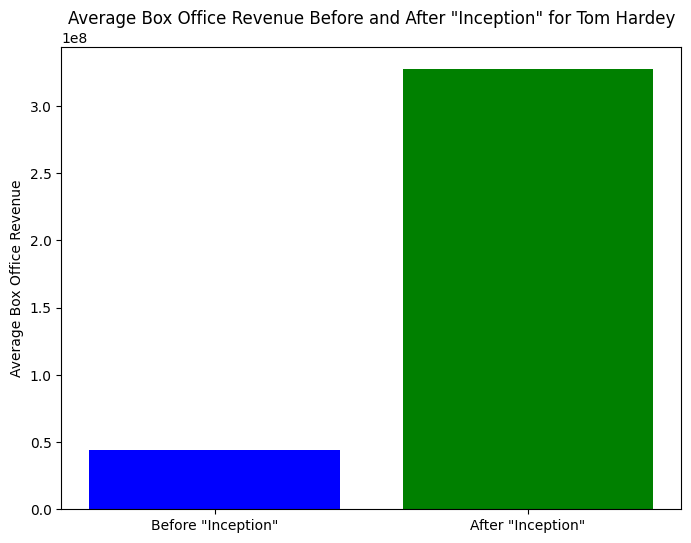

In [108]:
# Release year of "Inception"
release_year_Inception = pd.to_datetime("2010-07-08")

# Splitting the movies into before and after "28 Days Later"
before_Inception = tom[tom['release_date'] < release_year_Inception]
after_Inception = tom[tom['release_date'] > release_year_Inception]

# Plotting
plt.figure(figsize=(12, 6))

# Calculating average box office revenue for each group
avg_revenue_before = before_Inception['boxOffice_revenue'].mean()
avg_revenue_after = after_Inception['boxOffice_revenue'].mean()

# Plotting
plt.figure(figsize=(8, 6))

# Bar chart
plt.bar('Before "Inception"', avg_revenue_before, color='blue')
plt.bar('After "Inception"', avg_revenue_after, color='green')

# Adding labels and title
plt.ylabel('Average Box Office Revenue')
plt.title('Average Box Office Revenue Before and After "Inception" for Tom Hardey')
plt.xticks([0, 1], ['Before "Inception"', 'After "Inception"'])

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

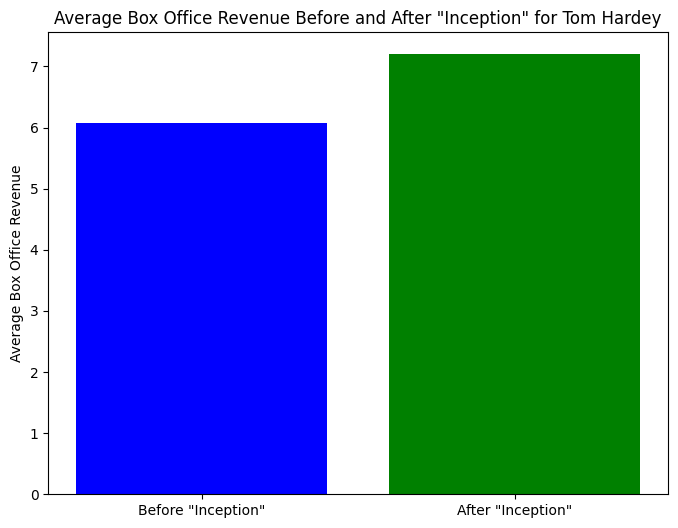

In [110]:
# Release year of "28 Days Later"
release_year_Inception = pd.to_datetime("2010-07-08")  # Adjust the year if necessary

# Splitting the movies into before and after "28 Days Later"
before_Inception = tom[tom['release_date'] < release_year_Inception]
after_Inception = tom[tom['release_date'] > release_year_Inception]

# Plotting
plt.figure(figsize=(12, 6))

# Calculating average box office revenue for each group
avg_revenue_before = before_Inception['vote_average'].mean()
avg_revenue_after = after_Inception['vote_average'].mean()

# Plotting
plt.figure(figsize=(8, 6))

# Bar chart
plt.bar('Before "Inception"', avg_revenue_before, color='blue')
plt.bar('After "Inception"', avg_revenue_after, color='green')

# Adding labels and title
plt.ylabel('Average Box Office Revenue')
plt.title('Average Box Office Revenue Before and After "Inception" for Tom Hardey')
plt.xticks([0, 1], ['Before "Inception"', 'After "Inception"'])

# Show the plot
plt.show()

The trajectory of Tom Hardy's career post-"Inception" serves as a prime example of how strategic collaborations with notable directors and producers can not only diversify an actor's portfolio but also significantly boost their marketability and box office draw. This pattern is a testament to the **power of strategic collaborations** in the film industry to propel an actor's career to new heights.


### Careers Evolution

For this research question, we will delve into the evolution of an actor's career, with a specific focus on the genres of movies they participate in. This aspect of an actor's career trajectory can be intriguing, as it often reflects not only personal growth and changing artistic interests but also shifts in industry trends and audience expectations. As actors age, they may transition from one genre to another for various reasons. These shifts could be driven by a range of factors, including personal choice, typecasting, changes in the types of roles offered to them as they age, or even a strategic response to evolving trends within the film industry.

In the early stages of their careers, actors might be more inclined to experiment with different genres or take on roles that challenge them in various ways. This period is often characterized by a quest for establishing a foothold in the industry, where versatility and a wide range of roles can be advantageous. As actors establish themselves, certain patterns might emerge, reflecting their strengths or audience preferences. For instance, an actor known for compelling dramatic performances might increasingly find themselves sought after for similar roles.

In [118]:
actor_movies_df = actor_movies_df.explode('title')
actor_movies_genre_df = actor_movies_df.merge(metadata_df, left_on='title', right_on='title', how='left')


In [119]:
actor_movies_genre_df["age_at_release"] = actor_movies_genre_df["release_date"].dt.year - actor_movies_genre_df["Actor birth year"]
actor_movies_genre_df["age_at_release"] = actor_movies_genre_df["age_at_release"].astype(float)
actor_movies_genre_df.head()

,Actor date of birth,Actor gender,Actor height,Actor name,Freebase actor ID,Actor birth year,title,freebase_id_x,Actor ethnicity,id,freebase_id_y,release_date,boxOffice_revenue,runtime,language,country,genres,year,age_at_release
0,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,Ghosts of Mars,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,975900,/m/03vyhn,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,43.0
1,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,The Ministers,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,24767455,/m/0809s7n,2009-10-16,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02wtdps"": ""C...",2009.0,51.0
2,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,Almost a Woman,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,5337169,/m/0dg7mt,NaT,NaN,90.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/015w9s"": ""Television movie"", ""/m/0hj3mws""...",NaN,NaN
3,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,RoboCop 2,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,1330220,/m/04t8wq,1990-06-22,45681173.0,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1990.0,32.0
4,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,Downtown,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,14686017,/m/03gt21w,1990-01-12,2346150.0,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1990.0,32.0


In [120]:

actor_movies_genre_df['genres'] = actor_movies_genre_df['genres'].apply(extract_genres)
actor_movies_genre_df = actor_movies_genre_df.explode('genres')
actor_movies_genre_df.head()

,Actor date of birth,Actor gender,Actor height,Actor name,Freebase actor ID,Actor birth year,title,freebase_id_x,Actor ethnicity,id,freebase_id_y,release_date,boxOffice_revenue,runtime,language,country,genres,year,age_at_release
0,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,Ghosts of Mars,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,975900,/m/03vyhn,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Thriller,2001.0,43.0
0,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,Ghosts of Mars,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,975900,/m/03vyhn,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Science Fiction,2001.0,43.0
0,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,Ghosts of Mars,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,975900,/m/03vyhn,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Horror,2001.0,43.0
0,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,Ghosts of Mars,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,975900,/m/03vyhn,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Adventure,2001.0,43.0
0,1958-08-26,F,1.62,Wanda De Jesus,/m/03wcfv7,1958.0,Ghosts of Mars,"[/m/03vyhn, /m/0809s7n, /m/0dg7mt, /m/04t8wq, ...",NaN,975900,/m/03vyhn,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Supernatural,2001.0,43.0


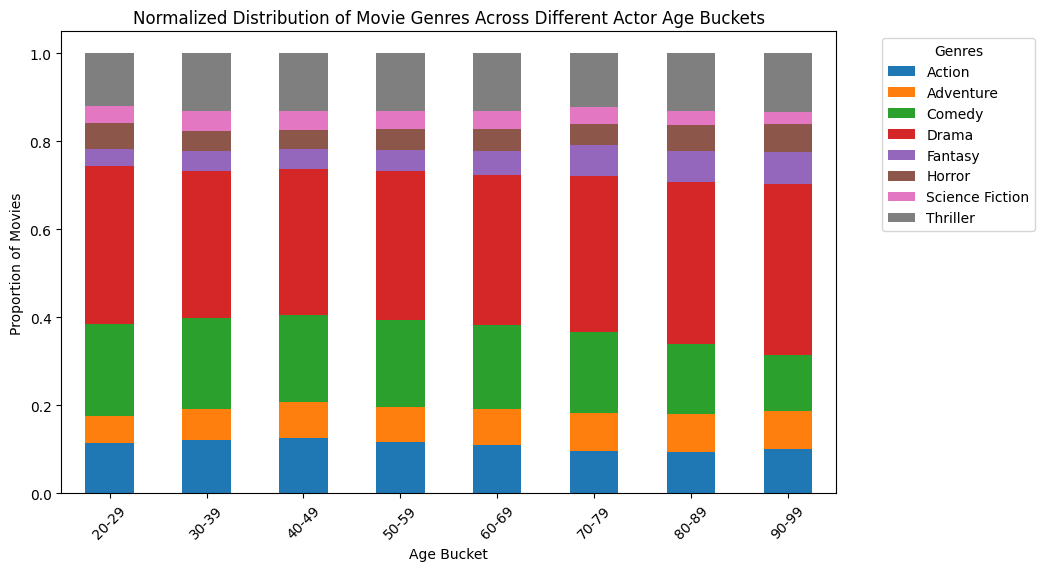

In [123]:
# List of relevant genres
relevant_genres = ['Thriller', 'Drama', 'Comedy', 'Horror', "Action", "Adventure", "Romance", "Science Fiction", "Fantasy"]

filtered_df = actor_movies_genre_df[actor_movies_genre_df['genres'].isin(relevant_genres)]

# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Categorize age and explode genres
filtered_df['age_group'] = pd.cut(filtered_df['age_at_release'], bins=age_bins, labels=age_labels)
filtered_df = filtered_df.explode('genres')

# Group by age group and genres, then plot
genre_distribution_per_age_group = filtered_df.groupby(['age_group', 'genres']).size().unstack(fill_value=0)

normalized_genre_distribution = genre_distribution_per_age_group.div(genre_distribution_per_age_group.sum(axis=1), axis=0)

# Plotting the normalized data
normalized_genre_distribution.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Age Bucket')
plt.ylabel('Proportion of Movies')
plt.title('Normalized Distribution of Movie Genres Across Different Actor Age Buckets')
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Analysis of Movie Genres and Actor Age Distribution

Analyzing the distribution of movie genres against the age of actors at the time of release reveals distinct patterns. 

**Drama Movies**
For *drama movies*, there's an observable increase in participation with the age of the actors. This trend might stem from the depth and complexity of dramatic roles, which older actors, with their wealth of experience and nuanced understanding of human emotions, are often more adept at portraying. Their life experience lends authenticity and gravitas to these roles, making them particularly effective in dramatic narratives.

**Fantasy Films**
In *fantasy films*, a similar increase is noted with older actors. This could be attributed to the fact that many fantasy narratives require seasoned, wise characters, like wizards or elders. Roles exemplified by Dumbledore in "Harry Potter" or Gandalf in "The Lord of the Rings" are prime examples. Older actors bring a believable sense of wisdom and historical depth to these characters, enhancing the storytelling.

**Comedy Films**
On the other hand, *comedy films* show a decrease in participation by older actors. This might be due to the physical demands of physical comedy, or the themes and situations in comedies that often resonate more with a younger demographic. Additionally, as the comedy genre evolves with changing cultural references and styles, younger actors may be perceived as more relatable to the target audience.

These trends highlight not just individual actor choices, but also broader industry practices and audience expectations, reflecting the dynamic interplay between career trajectories, industry trends, and cultural shifts.

Note: For the purpose of readability, in the above plot, we tried to only include some of the most prominent genres in the film industry. The database contains a substantial amount of very detailed genres, which we will try to group when working on Milestone 3.

Investigating the career trajectories of high-profile actors offers valuable insights into how genre preferences evolve over time. A prime example is Robert De Niro, whose early career was marked by intense drama movies and iconic gangster roles. His performances in films like "Taxi Driver" and "Raging Bull" showcased his ability to bring depth and intensity to complex characters, while his roles in "Goodfellas" and "The Godfather II" cemented his reputation as a formidable presence in the gangster genre.

However, in his later career, De Niro exhibited a notable shift in the types of roles he chose. He began to appear more frequently in comedies and lighter genres, a departure from the intense, often brooding characters of his earlier years. This transition can be seen in films like the "Meet the Parents" trilogy and "The Intern," where he embraced more comedic, approachable characters. This evolution in De Niro's career could be indicative of a desire to explore different facets of his acting abilities or possibly a response to changing audience expectations and industry trends.

<p style="display: flex; justify-content: center; align-items: center;">
  <img src="https://media2.giphy.com/media/CpcpDSci3ljCU/giphy.gif?cid=ecf05e47g5jcc8j0btdftwo1nbbk892n9zk9b0e2tca31tjs&ep=v1_gifs_search&rid=giphy.gif&ct=g" alt="First GIF" style="width: 45%; margin-right: 10px;"/>
  <img src="https://media.tenor.com/SQHp_aUPdd4AAAAC/the-intern-robert-de-niro.gif" alt="Second GIF" style="width: 45%;"/>
</p>


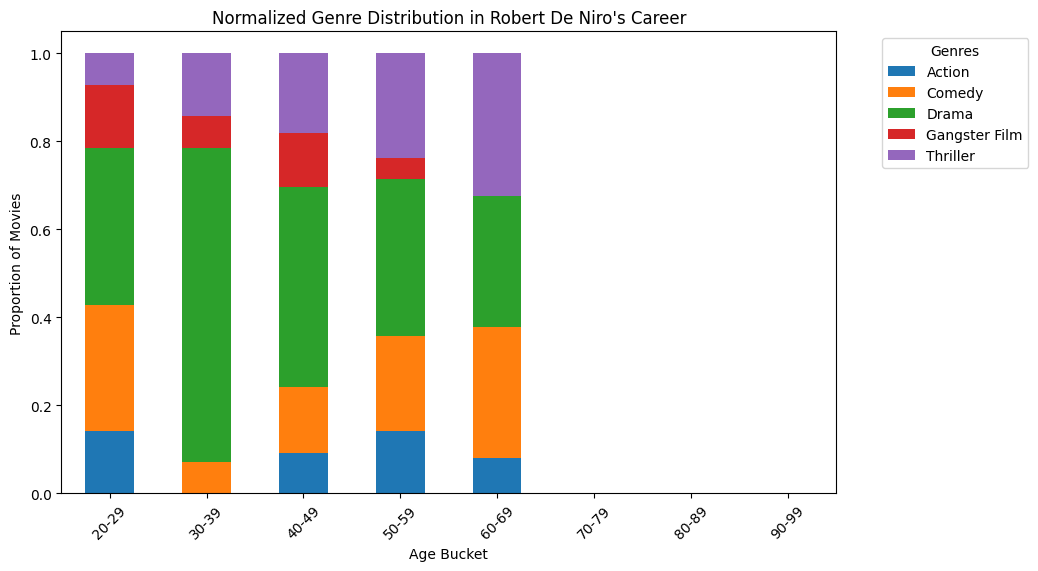

In [124]:
# Filtering for Robert De Niro
relevant_genres = ['Thriller', 'Drama', 'Comedy', "Action", "Gangster Film"]
deniro_df = actor_movies_genre_df[actor_movies_genre_df['Actor name'] == 'Robert De Niro']
deniro_df = deniro_df[deniro_df['genres'].isin(relevant_genres)]
deniro_df.to_csv('deniro.csv')
deniro_df['age_group'] = pd.cut(deniro_df['age_at_release'], bins=age_bins, labels=age_labels)
deniro_df = deniro_df.explode('genres')
deniro_genre_distribution = deniro_df.groupby(['age_group', 'genres']).size().unstack(fill_value=0)
normalized_deniro_distribution = deniro_genre_distribution.div(deniro_genre_distribution.sum(axis=1), axis=0)


# Plot for Robert De Niro
normalized_deniro_distribution.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Age Bucket')
plt.ylabel('Proportion of Movies')
plt.title('Normalized Genre Distribution in Robert De Niro\'s Career')
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()